In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_style('ticks')
sns.set_context('paper')
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

<h1 align="center">Nucleobases</h1>

In [4]:
eadf_1 = pd.read_excel('EOM-MP2T.xlsx',sheet_name='set1_EA_nucleobases', skiprows=1)
eadf_1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,EOM-MP2,EOM-MP2T,EOM-CCSD,EOM-MP2.1,EOM-MP2T.1,EOM-MP2.2,...,MP2 first transition,MP2T first transition,Abs MP2 first transition,Abs MP2T first transition,Unnamed: 15,Unnamed: 16,Unnamed: 17,MSE,-0.00293055555555555,0.0507888888888889
0,S0101,Uracil,Cs,1A',2.1280,2.1891,2.2035,-0.0755,-0.0144,0.0755,...,-0.0948,0.0328,0.0948,0.0328,NaN,NaN,NaN,MUE,0.043886,0.057600
1,NaN,NaN,NaN,2A',3.4270,3.4710,3.4805,-0.0535,-0.0095,0.0535,...,-0.0667,0.0529,0.0667,0.0529,NaN,NaN,NaN,SD,0.053402,0.063263
2,NaN,NaN,NaN,1A'',0.8190,0.9466,0.9138,-0.0948,0.0328,0.0948,...,-0.0801,0.0449,0.0801,0.0449,NaN,NaN,NaN,Max. UE,0.112300,0.155100
3,NaN,NaN,NaN,2A'',2.6452,2.7144,2.6207,0.0245,0.0937,0.0245,...,0.0662,0.1159,0.0662,0.1159,NaN,NaN,NaN,NaN,NaN,NaN
4,S0102,Thymine,Cs,1A',2.2204,2.2762,2.2860,-0.0656,-0.0098,0.0656,...,-0.0264,-0.0145,0.0264,0.0145,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Dataframe for normal errors

err_ea_df_1 = eadf_1[['EOM-MP2.1', 'EOM-MP2T.1']] #We take the specific columns
err_ea_df_1.columns = ['MP2', 'MP2T'] # Now just rename the columns
err_ea_df_1 = err_ea_df_1.dropna() #We ignore the non-values encountered

err_ea_df_1.head() #This juts show the first values of the columns to make sure that we took the right ones

,MP2,MP2T
0,-0.0755,-0.0144
1,-0.0535,-0.0095
2,-0.0948,0.0328
3,0.0245,0.0937
4,-0.0656,-0.0098


In [6]:
#Now just a quick statistical description of the datasets

err_ea_df_1.describe()

,MP2,MP2T
count,36.000000,36.000000
mean,-0.002931,0.050789
std,0.053402,0.063263
min,-0.094800,-0.019600
25%,-0.040225,-0.004125
50%,-0.005250,0.019300
75%,0.029550,0.107775
max,0.112300,0.155100


In [7]:
#Dataframe for absolute errors

abs_ea_df_1 = eadf_1[['EOM-MP2.2', 'EOM-MP2T.2']] #We take the specific columns
abs_ea_df_1.columns = ['Abs MP2', 'Abs MP2T'] # Now just rename the columns
abs_ea_df_1 = abs_ea_df_1.dropna() #We ignore the non-values encountered


abs_ea_df_1.head() #This juts show the first values of the columns to make sure that we took the right ones

,Abs MP2,Abs MP2T
0,0.0755,0.0144
1,0.0535,0.0095
2,0.0948,0.0328
3,0.0245,0.0937
4,0.0656,0.0098


In [8]:
#Now just a quick statistical description of the datasets

abs_ea_df_1.describe()

,Abs MP2,Abs MP2T
count,36.000000,36.000000
mean,0.043886,0.057600
std,0.029658,0.056946
min,0.001800,0.000700
25%,0.024875,0.006625
50%,0.036900,0.026200
75%,0.066050,0.107775
max,0.112300,0.155100


In [9]:
#Define the bins for the histograms
#Remember, if you use the key word "auto" in the bins parameter, Seaborn will fit the optimal number

bins_err_1 = np.linspace(-.1, 0.2, 7)
bins_abs_1 = np.linspace(0, 0.2, 7)

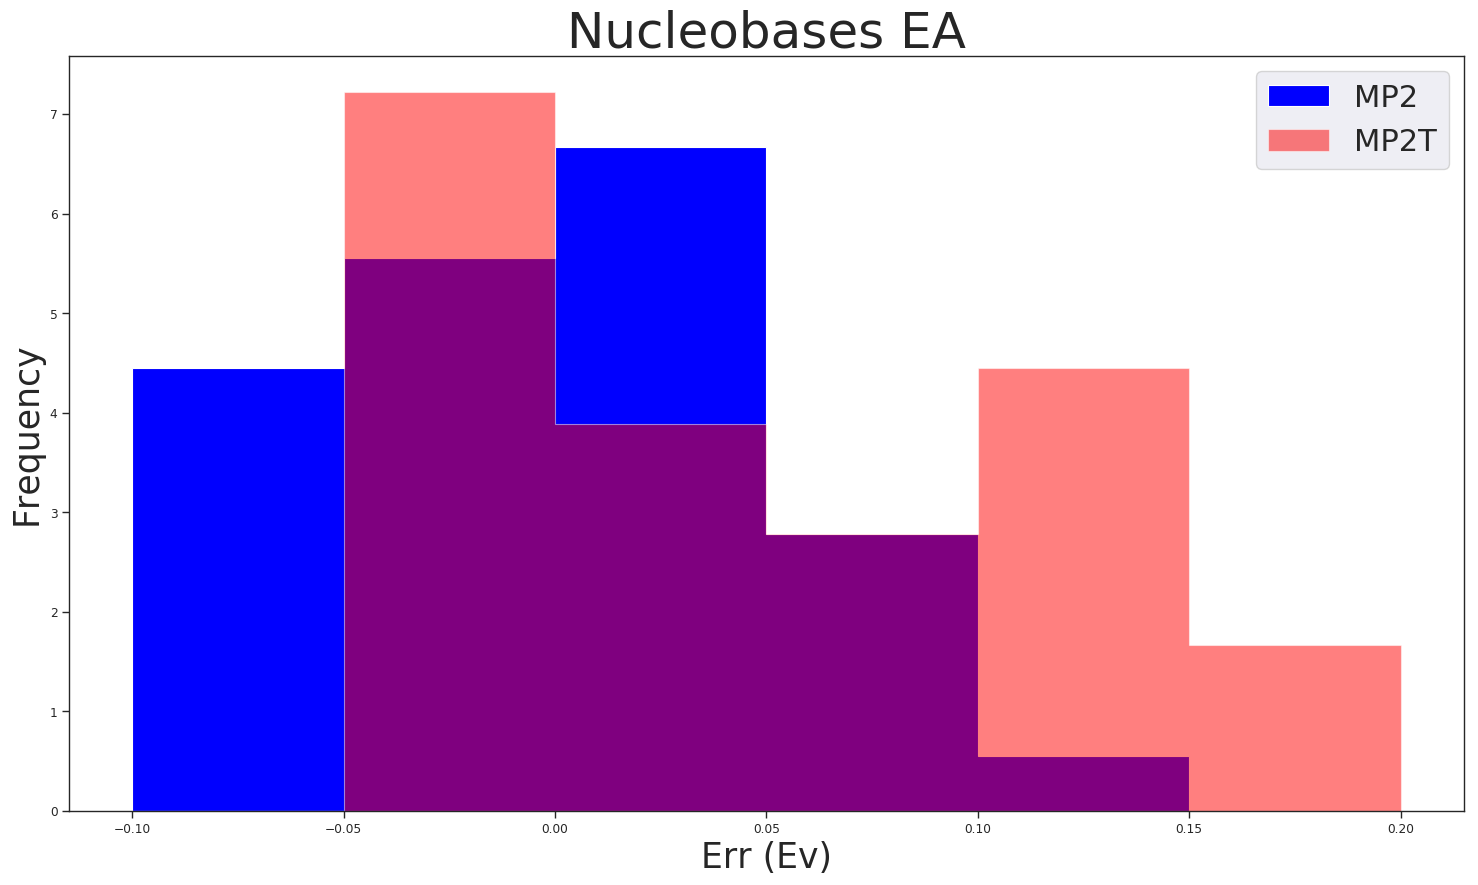

In [10]:
#Define plot size in inches (width, height) & resolution(DPI) and put a white background
fig = plt.figure(figsize=(18, 10), dpi=100)
sns.set_context('paper')


#Define the data
hist1 = err_ea_df_1['MP2']
hist2 = err_ea_df_1['MP2T']

#plot data
plt.hist(hist1, bins_err_1, histtype='stepfilled', label='MP2', color='blue', density=True)
plt.hist(hist2, bins_err_1, histtype='stepfilled', alpha=0.5, label='MP2T', color='red', density=True)

#configure  X axesgure(figsize=(15, 10)


#configure  Y axes


#labels
plt.xlabel("Err (Ev)", size=25)
plt.ylabel("Frequency", size=25)

#define font size
sns.set(font_scale=3)

#title
plt.title("Nucleobases EA")



#define font size
sns.set(font_scale=2)
plt.legend(loc='upper right')


plt.show()

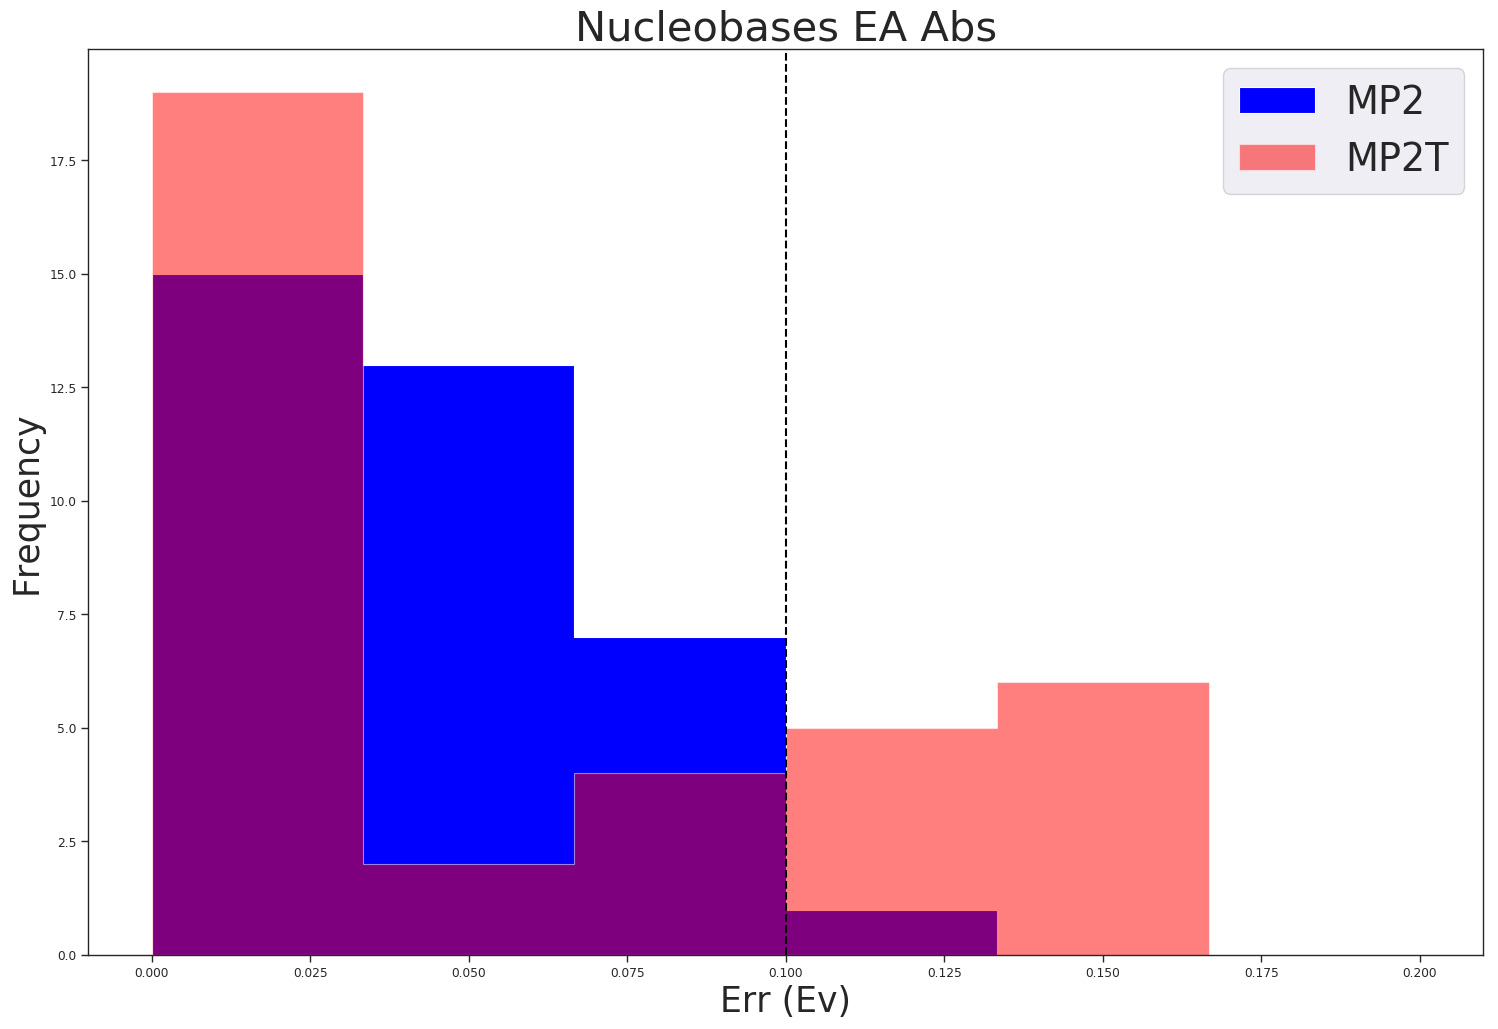

In [11]:
#Define plot size in inches (width, height) & resolution(DPI) and put a white background
fig = plt.figure(figsize=(18, 12), dpi=100)
sns.set_style('ticks')
sns.set_context('paper')


#Define the data
hist3 = abs_ea_df_1['Abs MP2']
hist4 = abs_ea_df_1['Abs MP2T']

#plot data
plt.hist(hist3, bins_abs_1, histtype='stepfilled', label='MP2', color='blue')
plt.hist(hist4, bins_abs_1, histtype='stepfilled', alpha=0.5, label='MP2T', color='red')

#configure  X axes


#configure  Y axes


#labels
plt.xlabel("Err (Ev)", size=25)
plt.ylabel("Frequency", size=25)

#define font size 
sns.set(font_scale=2.5)

#title
plt.title("Nucleobases EA Abs")

plt.axvline(0.1, color='black', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

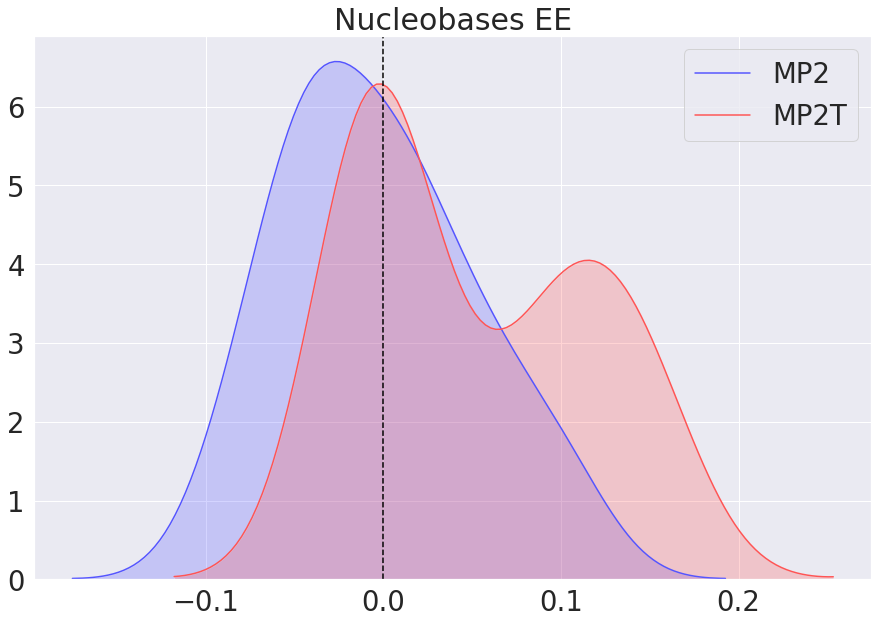

In [12]:
sns.set_style('ticks')
sns.set_context('paper')
fig = plt.figure(figsize=(15, 10))
c1, c2 = sns.color_palette("seismic", 2)



#define font size
sns.set(font_scale=2.5)

#title
plt.title("Nucleobases EE")

sns.kdeplot(err_ea_df_1.MP2, kernel='gau', label='MP2', shade=True, color=c1)
sns.kdeplot(err_ea_df_1.MP2T, kernel='gau',  label='MP2T',shade=True, color=c2)

plt.axvline(0, color='black', linestyle='dashed')

plt.show()

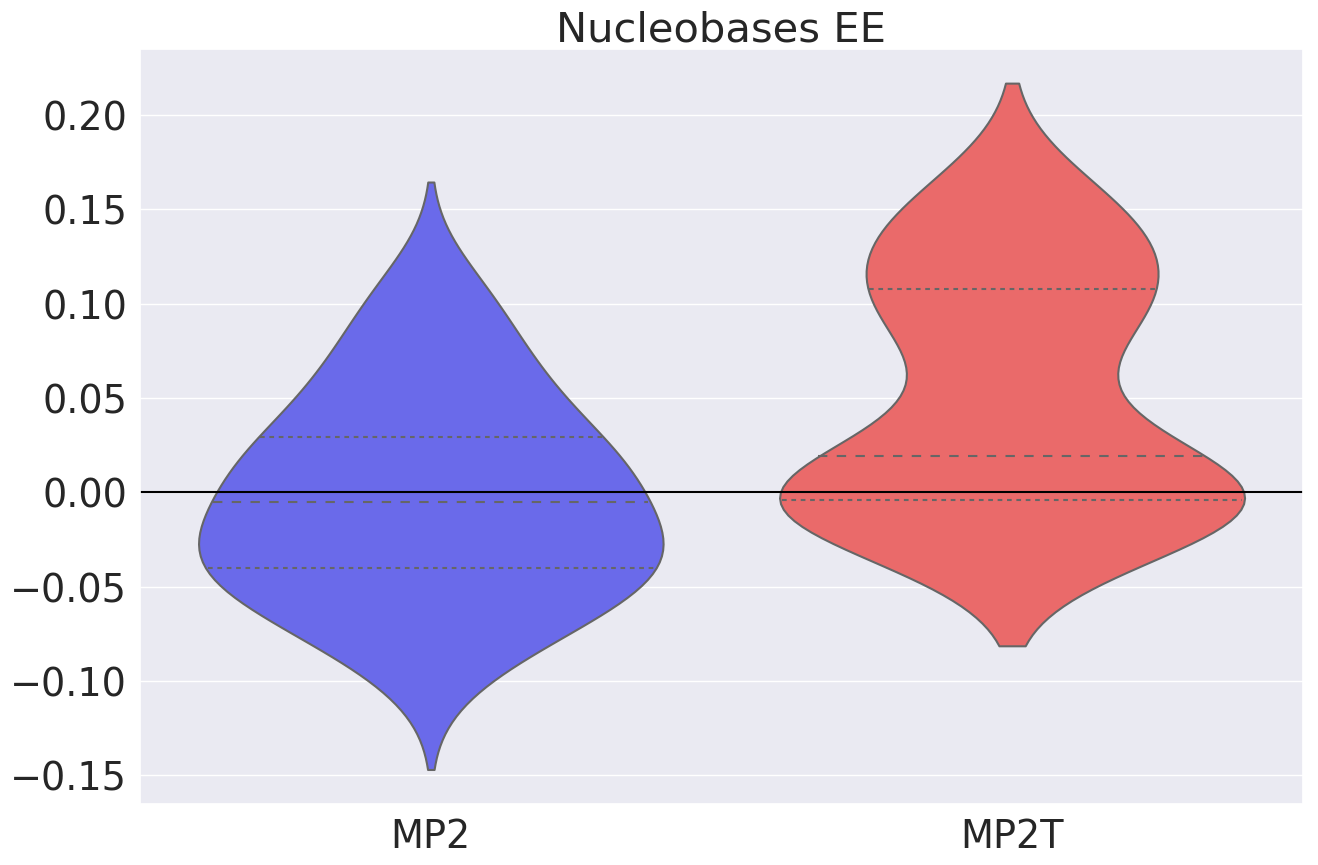

In [13]:
fig = plt.figure(figsize=(15, 10), dpi=100)
plt.axhline(0, color='black')
sns.set_style('ticks')
sns.set_context('paper')



#define font size
sns.set(font_scale=2.5)

#title
plt.title("Nucleobases EE")


# Draw a nested violinplot and split the violins for easier comparison
viol = sns.violinplot(data=err_ea_df_1, split=True, inner='quartile', palette='seismic')

<h1 align="center">Biomolecules</h1>

In [14]:
eadf_2 = pd.read_excel('EOM-MP2T.xlsx',sheet_name='set2_other_bio_EA', skiprows=1)
eadf_2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,EOM-MP2,EOM-MP2T,EOM-CCSD,EOM-MP2.1,EOM-MP2T.1,EOM-MP2.2,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,MSE,-0.0008181818182,0.03704090909
0,S0201,HBDI,Cs,1A',4.8383,4.8768,4.9081,-0.0698,-0.0313,0.0698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MUE,0.026391,0.050559
1,NaN,NaN,NaN,2A',5.8026,5.8287,5.8541,-0.0515,-0.0254,0.0515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SD,0.036834,0.056454
2,NaN,NaN,NaN,1A'',3.5426,3.5992,3.4430,0.0996,0.1562,0.0996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Max. UE,0.099600,0.156200
3,NaN,NaN,NaN,2A'',5.7079,5.7901,5.7271,-0.0192,0.0630,0.0192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S0202,4(5)-methylimidazole,Cs,1A',2.4848,2.4832,2.4907,-0.0059,-0.0075,0.0059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Dataframe for normal errors

err_ea_df_2 = eadf_2[['EOM-MP2.1', 'EOM-MP2T.1']] #We take the specific columns
err_ea_df_2.columns = ['MP2', 'MP2T'] # Now just rename the columns
err_ea_df_2 = err_ea_df_2.dropna() #We ignore the non-values encountered

err_ea_df_2.head() #This juts show the first values of the columns to make sure that we took the right ones

,MP2,MP2T
0,-0.0698,-0.0313
1,-0.0515,-0.0254
2,0.0996,0.1562
3,-0.0192,0.0630
4,-0.0059,-0.0075


In [16]:
#Now just a quick statistical description of the datasets

err_ea_df_2.describe()

,MP2,MP2T
count,22.000000,22.000000
mean,-0.000818,0.037041
std,0.036834,0.056454
min,-0.069800,-0.031300
25%,-0.022325,-0.012900
50%,-0.006200,0.026700
75%,0.015550,0.075875
max,0.099600,0.156200


In [17]:
#Dataframe for absolute errors

abs_ea_df_2 = eadf_2[['EOM-MP2.2', 'EOM-MP2T.2']] #We take the specific columns
abs_ea_df_2.columns = ['Abs MP2', 'Abs MP2T'] # Now just rename the columns
abs_ea_df_2 = abs_ea_df_2.dropna() #We ignore the non-values encountered


abs_ea_df_2.head() #This juts show the first values of the columns to make sure that we took the right ones

,Abs MP2,Abs MP2T
0,0.0698,0.0313
1,0.0515,0.0254
2,0.0996,0.1562
3,0.0192,0.0630
4,0.0059,0.0075


In [18]:
#Now just a quick statistical description of the datasets

abs_ea_df_2.describe()

,Abs MP2,Abs MP2T
count,22.000000,22.000000
mean,0.026391,0.050559
std,0.025056,0.044119
min,0.001300,0.004400
25%,0.007400,0.013450
50%,0.019750,0.040150
75%,0.027100,0.075875
max,0.099600,0.156200


In [19]:
#Define the bins for the histograms
#Remember, if you use the key word "auto" in the bins parameter, Seaborn will fit the optimal number

bins_err_2 = np.linspace(-0.1, 0.2, 6)
bins_abs_2 = np.linspace(0, 0.2, 6)

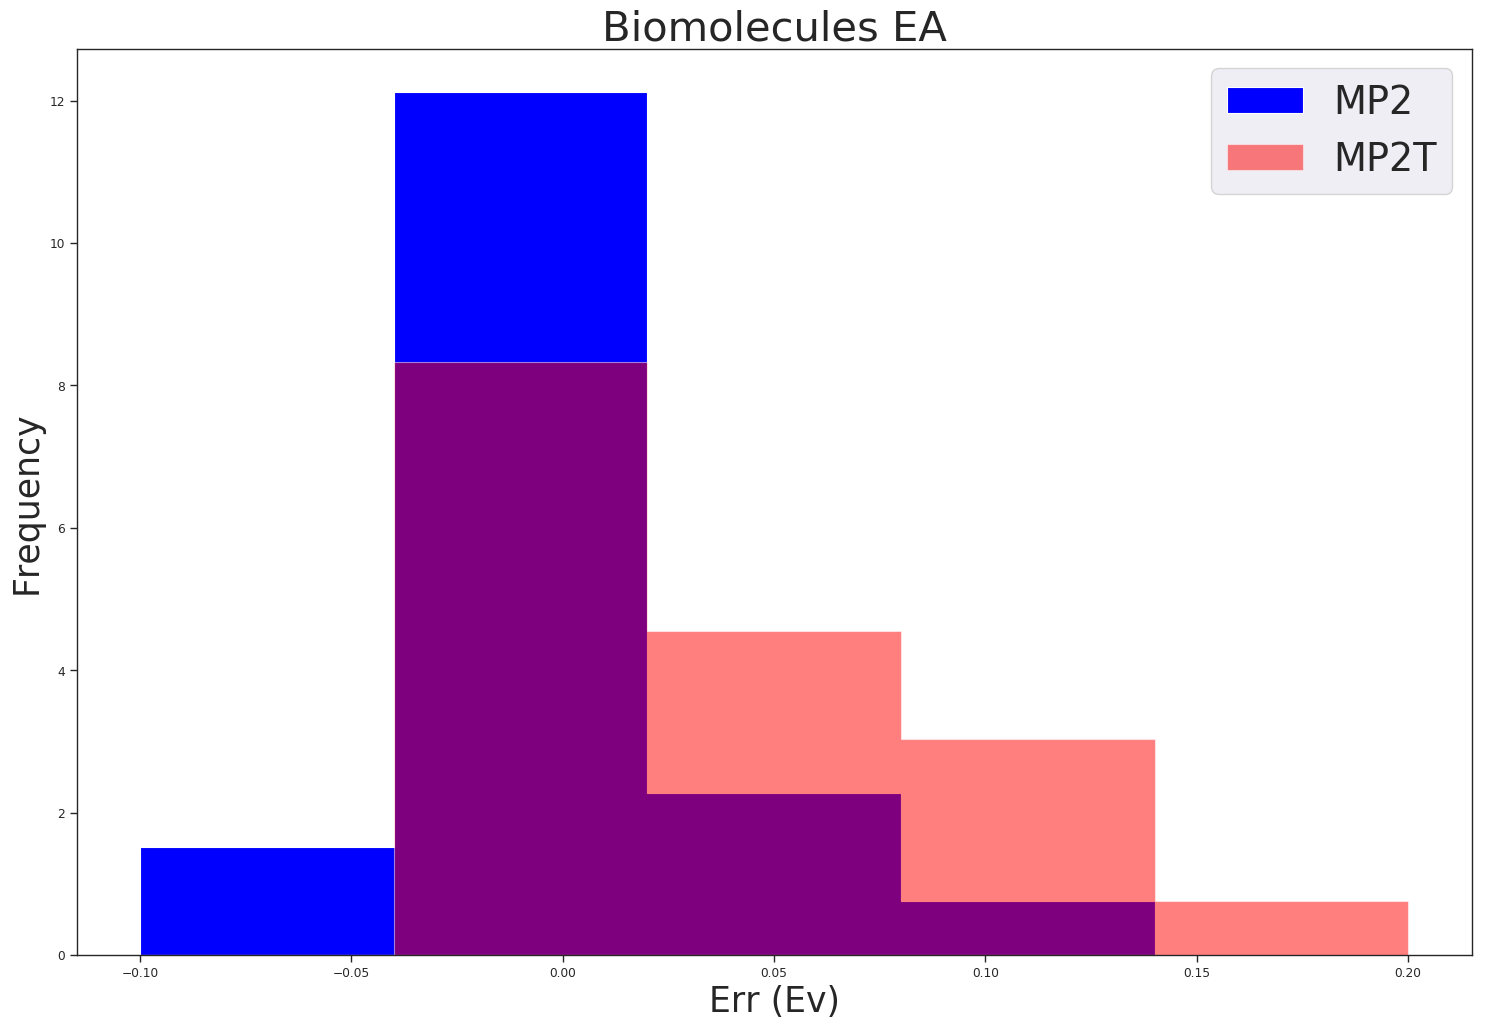

In [20]:
#Define plot size in inches (width, height) & resolution(DPI) and put a white background
fig = plt.figure(figsize=(18, 12), dpi=100)
sns.set_style('ticks')
sns.set_context('paper')


#Define the data
hist1 = err_ea_df_2['MP2']
hist2 = err_ea_df_2['MP2T']

#plot data
plt.hist(hist1, bins_err_2, histtype='stepfilled', label='MP2', color='blue', density=True)
plt.hist(hist2, bins_err_2, histtype='stepfilled', alpha=0.5, label='MP2T', color='red', density=True)

#configure  X axesgure(figsize=(15, 10)


#configure  Y axes


#labels
plt.xlabel("Err (Ev)", size=25)
plt.ylabel("Frequency", size=25)

#define font size
sns.set(font_scale=2.5)

#title
plt.title("Biomolecules EA")



#define font size
sns.set(font_scale=2.5)

#title

plt.legend(loc='upper right')

plt.legend(loc='upper right')
plt.show()

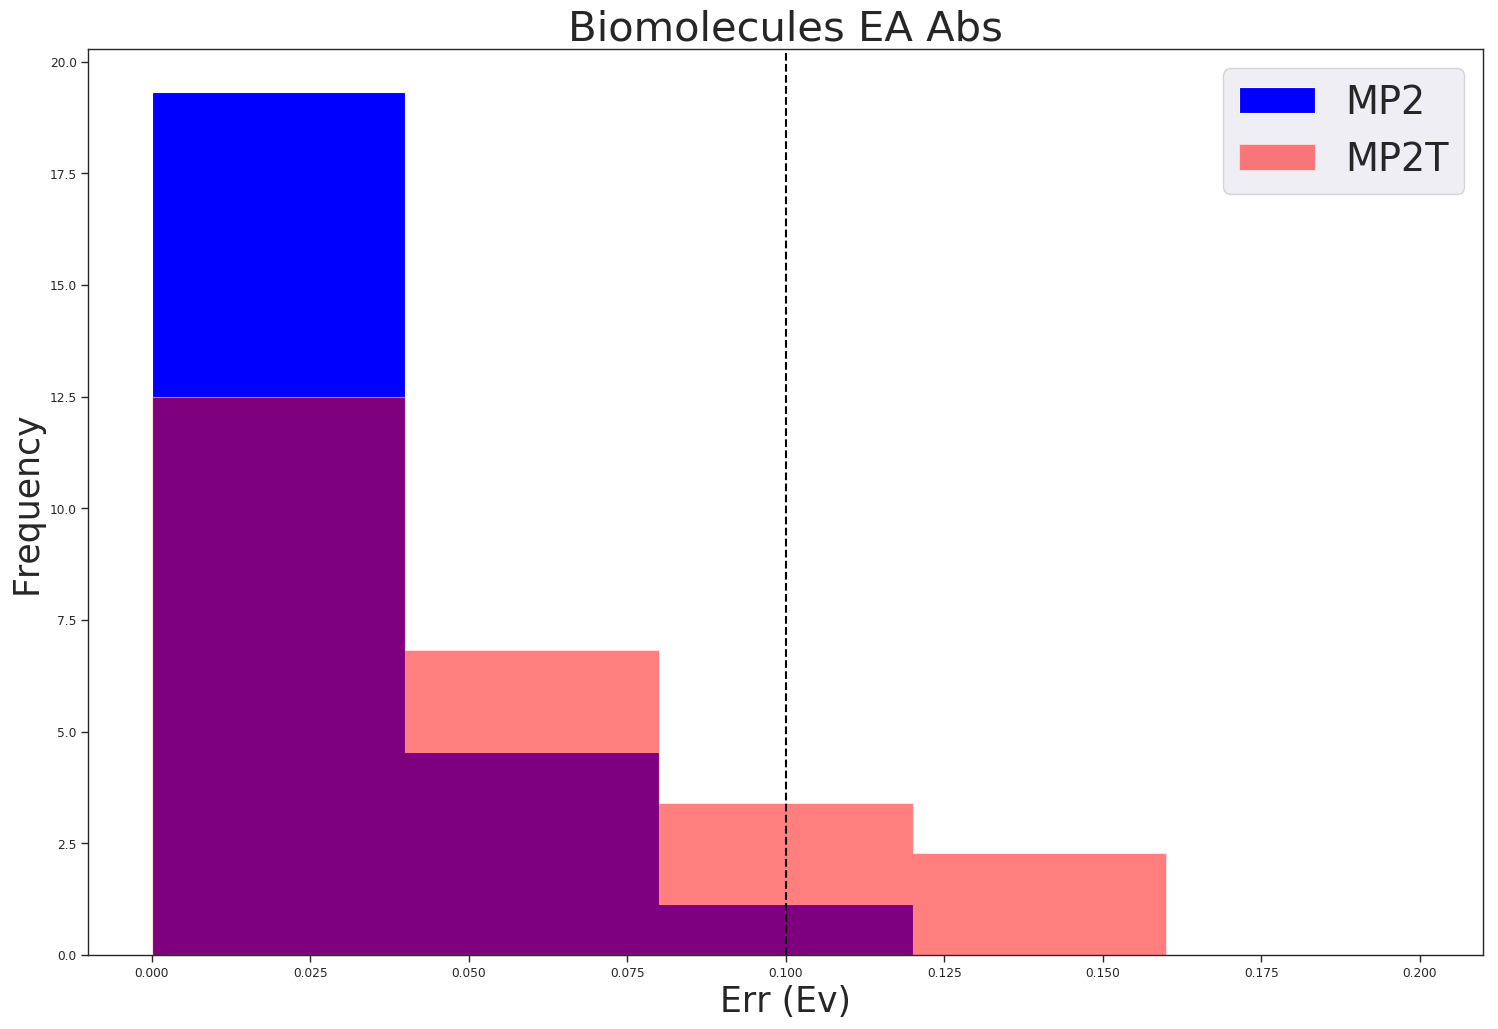

In [21]:
#Define plot size in inches (width, height) & resolution(DPI) and put a white background
fig = plt.figure(figsize=(18, 12), dpi=100)
sns.set_style('ticks')
sns.set_context('paper')


#Define the data
hist3 = abs_ea_df_2['Abs MP2']
hist4 = abs_ea_df_2['Abs MP2T']

#plot data
plt.hist(hist3, bins_abs_2, histtype='stepfilled', label='MP2', color='blue', density=True)
plt.hist(hist4, bins_abs_2, histtype='stepfilled', alpha=0.5, label='MP2T', color='red', density=True)

#configure  X axes


#configure  Y axes


#labels
plt.xlabel("Err (Ev)", size=25)
plt.ylabel("Frequency", size=25)

#define font size 592 
sns.set(font_scale=2.5)

#title
plt.title("Biomolecules EA Abs")

plt.axvline(0.1, color='black', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

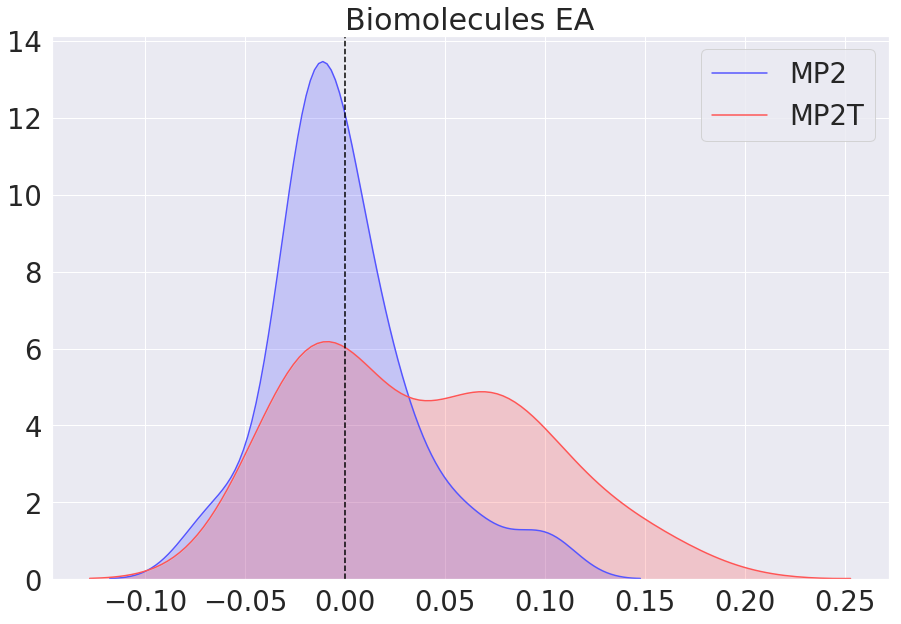

In [22]:
sns.set_style('ticks')
sns.set_context('paper')
fig = plt.figure(figsize=(15, 10))
c1, c2 = sns.color_palette("seismic", 2)


#define font size
sns.set(font_scale=2.5)

#title
plt.title("Biomolecules EA")

sns.kdeplot(err_ea_df_2.MP2, kernel='gau', label='MP2', shade=True, color=c1)
sns.kdeplot(err_ea_df_2.MP2T, kernel='gau',  label='MP2T',shade=True, color=c2)

plt.axvline(0, color='black', linestyle='dashed')
plt.show()

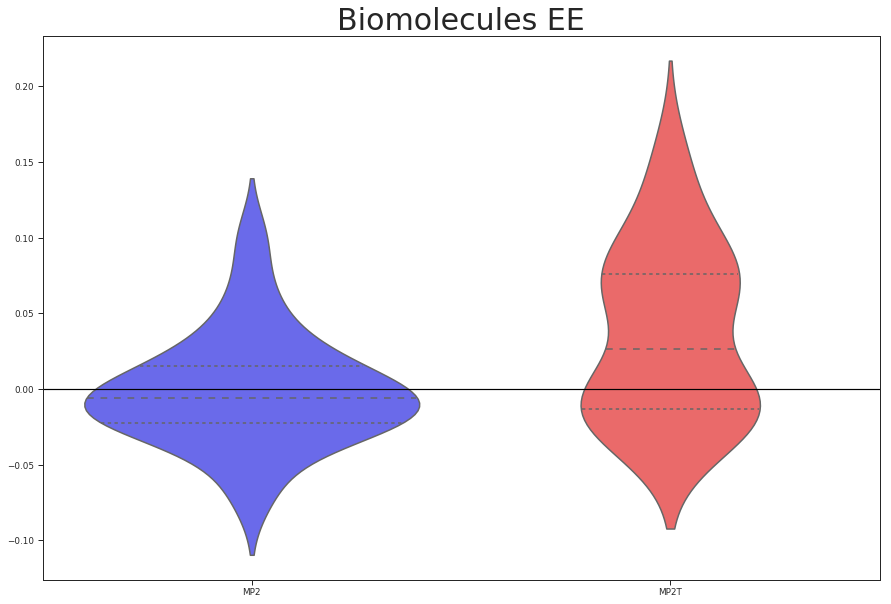

In [23]:
sns.set_style('ticks')
sns.set_context('paper')
fig = plt.figure(figsize=(15, 10))
plt.axhline(0, color='black')

#define font size
sns.set(font_scale=2.5)

#title
plt.title("Biomolecules EE")


# Draw a nested violinplot and split the violins for easier comparison
viol = sns.violinplot(data=err_ea_df_2, split=True, inner='quartile', palette='seismic')

<h1 align="center">Quinones</h1>

In [24]:
eadf_3 = pd.read_excel('EOM-MP2T.xlsx',shee_tname='set3_EA_quinones', skiprows=1)
eadf_3.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,EOM-MP2,EOM-MP2T,EOM-CCSD,EOM-MP2.1,EOM-MP2T.1,EOM-MP2.2,...,MP2 first transition,MP2T first transition,Abs MP2 first transition,Abs MP2T first transition,Unnamed: 15,Unnamed: 16,Unnamed: 17,MSE,0.211172222222222,0.175233333333333
0,S0101,Uracil,Cs,1A',5.8191,5.8048,5.7296,0.0895,0.0752,0.0895,...,0.0417,0.1052,0.0417,0.1052,NaN,-0.2226,NaN,MUE,0.211172,0.175233
1,NaN,NaN,NaN,2A',6.9856,6.9899,6.8870,0.0986,0.1029,0.0986,...,0.0605,0.1235,0.0605,0.1235,NaN,NaN,NaN,SD,0.104691,0.072312
2,NaN,NaN,NaN,1A'',5.2777,5.3412,5.2360,0.0417,0.1052,0.0417,...,0.116,0.1285,0.1160,0.1285,NaN,NaN,NaN,Max. UE,0.385300,0.327300
3,NaN,NaN,NaN,2A'',6.6855,6.7640,6.6488,0.0367,0.1152,0.0367,...,0.2036,0.1641,0.2036,0.1641,NaN,NaN,NaN,NaN,NaN,NaN
4,S0102,Thymine,Cs,1A',5.7576,5.7318,5.6315,0.1261,0.1003,0.1261,...,0.2904,0.2814,0.2904,0.2814,NaN,-0.4486,NaN,NaN,NaN,NaN


In [25]:
#Dataframe for normal errors

err_ea_df_3 = eadf_3[['EOM-MP2.1', 'EOM-MP2T.1']] #We take the specific columns
err_ea_df_3.columns = ['MP2', 'MP2T'] # Now just rename the columns
err_ea_df_3 = err_ea_df_3.dropna() #We ignore the non-values encountered

err_ea_df_3.head() #This juts show the first values of the columns to make sure that we took the right ones

,MP2,MP2T
0,0.0895,0.0752
1,0.0986,0.1029
2,0.0417,0.1052
3,0.0367,0.1152
4,0.1261,0.1003


In [26]:
#Now just a quick statistical description of the datasets

err_ea_df_3.describe()

,MP2,MP2T
count,36.000000,36.000000
mean,0.211172,0.175233
std,0.104691,0.072312
min,0.036700,0.052000
25%,0.112750,0.123400
50%,0.233500,0.166750
75%,0.300475,0.232650
max,0.385300,0.327300


In [27]:
#Dataframe for absolute errors

abs_ea_df_3 = eadf_3[['EOM-MP2.2', 'EOM-MP2T.2']] #We take the specific columns
abs_ea_df_3.columns = ['Abs MP2', 'Abs MP2T'] # Now just rename the columns
abs_ea_df_3 = abs_ea_df_3.dropna() #We ignore the non-values encountered


abs_ea_df_3.head() #This juts show the first values of the columns to make sure that we took the right ones

,Abs MP2,Abs MP2T
0,0.0895,0.0752
1,0.0986,0.1029
2,0.0417,0.1052
3,0.0367,0.1152
4,0.1261,0.1003


In [28]:
#Now just a quick statistical description of the datasets

abs_ea_df_3.describe()

,Abs MP2,Abs MP2T
count,36.000000,36.000000
mean,0.211172,0.175233
std,0.104691,0.072312
min,0.036700,0.052000
25%,0.112750,0.123400
50%,0.233500,0.166750
75%,0.300475,0.232650
max,0.385300,0.327300


In [29]:
#Define the bins for the histograms
#Remember, if you use the key word "auto" in the bins parameter, Seaborn will fit the optimal number

bins_err_3 = np.linspace(-0.2, 0.32, 34)
bins_abs_3 = np.linspace(0, 0.32, 17)

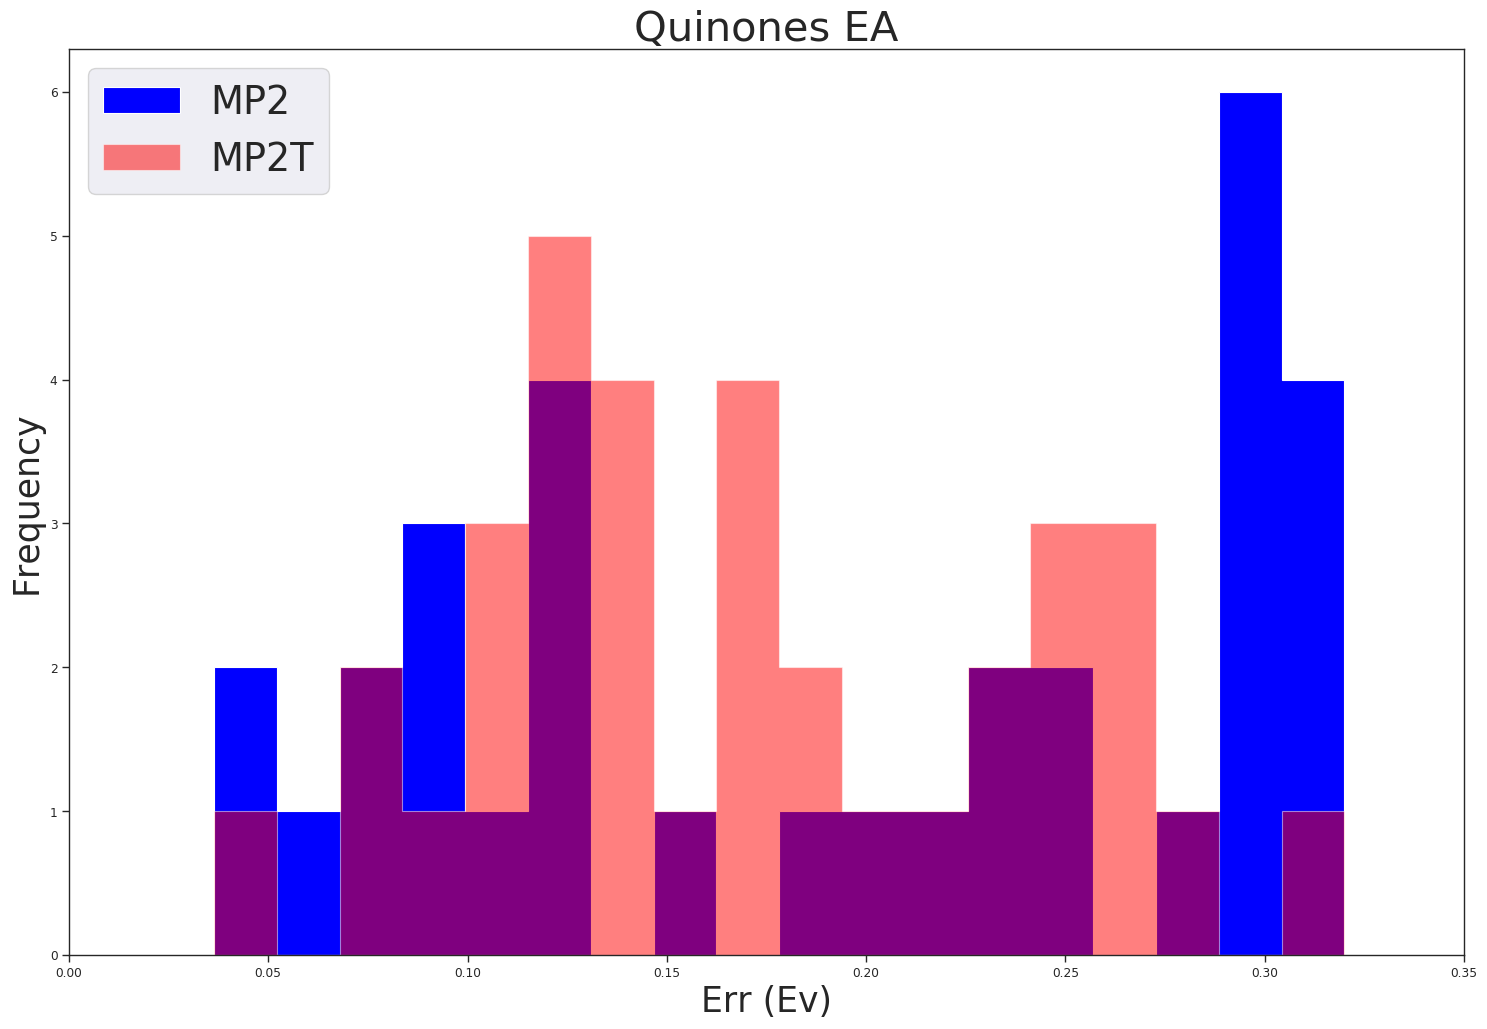

In [30]:
#Define plot size in inches (width, height) & resolution(DPI) and put a white background
fig = plt.figure(figsize=(18, 12), dpi=100)
sns.set_style('ticks')
sns.set_context('paper')


#Define the data
hist1 = err_ea_df_3['MP2']
hist2 = err_ea_df_3['MP2T']

#plot data
plt.hist(hist1, bins_err_3, histtype='stepfilled', label='MP2', color='blue')
plt.hist(hist2, bins_err_3, histtype='stepfilled', alpha=0.5, label='MP2T', color='red')

#configure  X axesgure(figsize=(15, 10)
plt.xlim(0,0.35)

#configure  Y axes


#labels
plt.xlabel("Err (Ev)", size=25)
plt.ylabel("Frequency", size=25)

#define font size
sns.set(font_scale=2.5)

#title
plt.title("Quinones EA")



#define font size
sns.set(font_scale=2.5)

#title

plt.legend(loc='upper left')
plt.show()

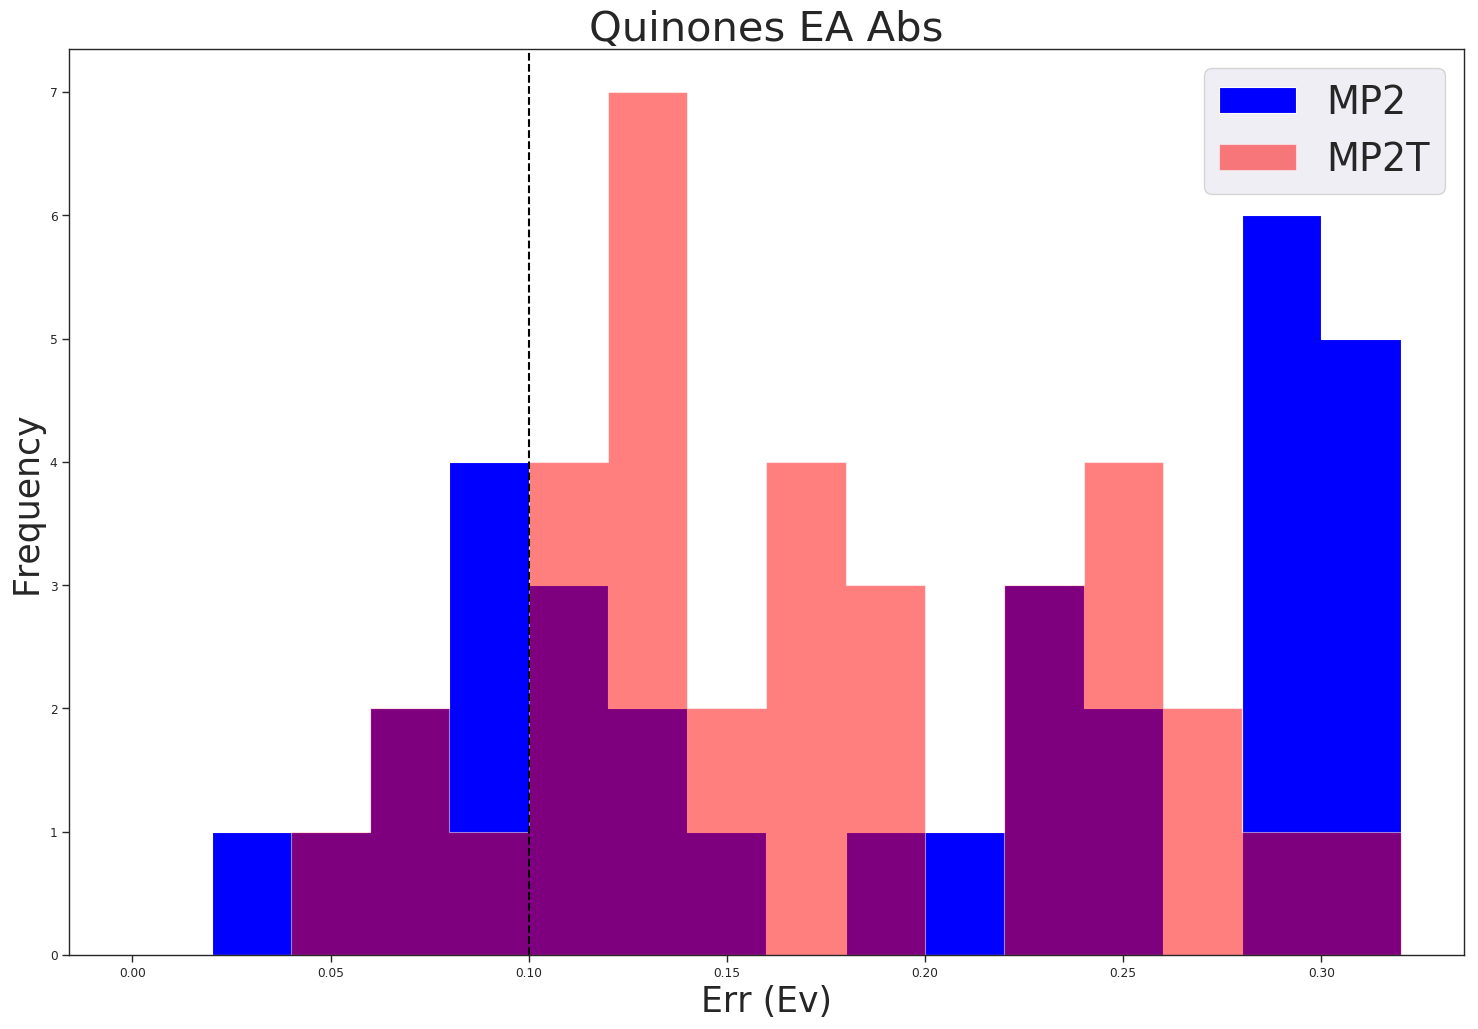

In [31]:
#Define plot size in inches (width, height) & resolution(DPI) and put a white background
fig = plt.figure(figsize=(18, 12), dpi=100)
sns.set_style('ticks')
sns.set_context('paper')


#Define the data
hist3 = abs_ea_df_3['Abs MP2']
hist4 = abs_ea_df_3['Abs MP2T']

#plot data
plt.hist(hist3, bins_abs_3, histtype='stepfilled', label='MP2', color='blue')
plt.hist(hist4, bins_abs_3, histtype='stepfilled', alpha=0.5, label='MP2T', color='red')

#configure  X axes


#configure  Y axes


#labels
plt.xlabel("Err (Ev)", size=25)
plt.ylabel("Frequency", size=25)

#define font size 592 
sns.set(font_scale=2.5)

#title
plt.title("Quinones EA Abs")

plt.axvline(0.1, color='black', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

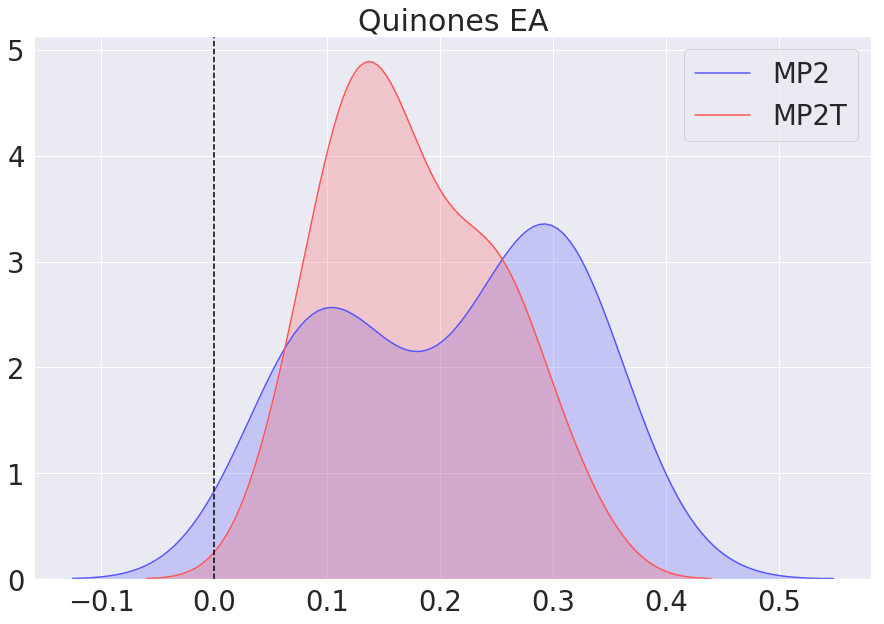

In [32]:
sns.set_style('ticks')
sns.set_context('paper')
fig = plt.figure(figsize=(15, 10))
c1, c2 = sns.color_palette("seismic", 2)


#define font size
sns.set(font_scale=2.5)

#title
plt.title("Quinones EA")

sns.kdeplot(err_ea_df_3.MP2, kernel='gau', label='MP2', shade=True, color=c1)
sns.kdeplot(err_ea_df_3.MP2T, kernel='gau',  label='MP2T',shade=True, color=c2)

plt.axvline(0, color='black', linestyle='dashed')
plt.show()

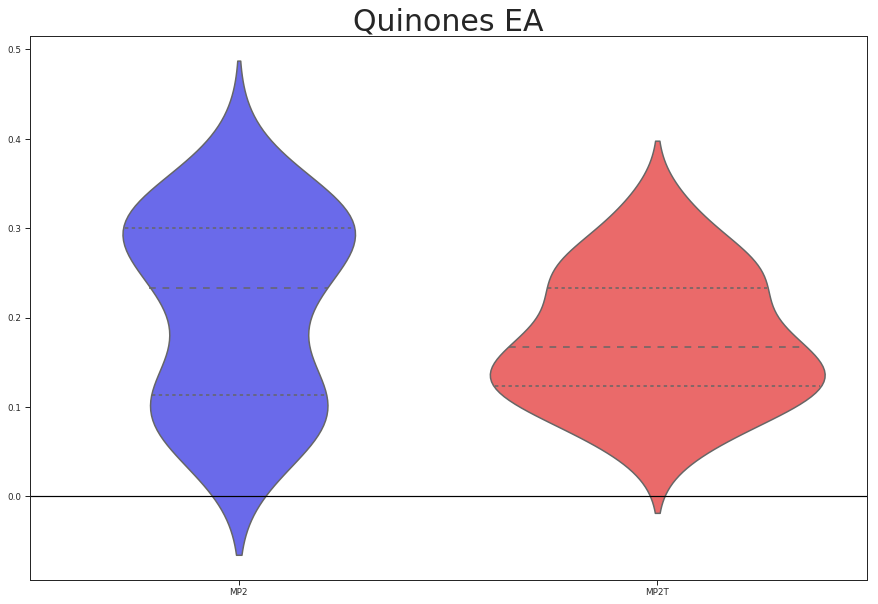

In [33]:
sns.set_style('ticks')
sns.set_context('paper')
fig = plt.figure(figsize=(15, 10))
plt.axhline(0, color='black')

#define font size
sns.set(font_scale=2.5)

#title
plt.title("Quinones EA")


# Draw a nested violinplot and split the violins for easier comparison
viol = sns.violinplot(data=err_ea_df_3, split=True, inner='quartile', palette='seismic')

<h1 align="center">Polyenes</h1>

In [34]:
eadf_4 = pd.read_excel('EOM-MP2T.xlsx',sheet_name='set4_EA_polyenes', skiprows=1)
eadf_4.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,EOM-CCSD,EOM-MP2,EOM-MP2T,EOM-MP2.1,EOM-MP2T.1,EOM-MP2.2,EOM-MP2T.2,MP2 first transition,MP2T first transition,Abs MP2 first transition,Abs MP2T first transition
0,s4mol1,ethylene,D2h,1Ag,3.6310,3.5859,3.6031,-0.0451,-0.0279,0.0451,0.0279,-0.1867,-0.1151,0.1867,0.1151
1,NaN,NaN,NaN,2Ag,9.1531,9.1075,9.1318,-0.0456,-0.0213,0.0456,0.0213,-0.1659,-0.0992,0.1659,0.0992
2,NaN,NaN,NaN,1B1g,6.0257,5.9955,6.0093,-0.0302,-0.0164,0.0302,0.0164,-0.1336,-0.0750,0.1336,0.0750
3,NaN,NaN,NaN,2B1g,11.5683,11.5280,11.5280,-0.0403,-0.0403,0.0403,0.0403,-0.1044,-0.0532,0.1044,0.0532
4,NaN,NaN,NaN,1B2g,2.8478,2.6611,2.7327,-0.1867,-0.1151,0.1867,0.1151,-0.0795,-0.0350,0.0795,0.0350


In [35]:
#Dataframe for normal errors

err_ea_df_4 = eadf_4[['EOM-MP2.1', 'EOM-MP2T.1']] #We take the specific columns
err_ea_df_4.columns = ['MP2', 'MP2T'] # Now just rename the columns
err_ea_df_4 = err_ea_df_4.dropna() #We ignore the non-values encountered

err_ea_df_4.head() #This juts show the first values of the columns to make sure that we took the right ones

,MP2,MP2T
0,-0.0451,-0.0279
1,-0.0456,-0.0213
2,-0.0302,-0.0164
3,-0.0403,-0.0403
4,-0.1867,-0.1151


In [36]:
#Now just a quick statistical description of the datasets

err_ea_df_4.describe()

,MP2,MP2T
count,72.000000,72.000000
mean,-0.064012,-0.039299
std,0.040232,0.031738
min,-0.186700,-0.163600
25%,-0.083075,-0.044125
50%,-0.045450,-0.030950
75%,-0.034775,-0.023025
max,0.008800,0.014000


In [37]:
#Dataframe for absolute errors

abs_ea_df_4 = eadf_4[['EOM-MP2.2', 'EOM-MP2T.2']] #We take the specific columns
abs_ea_df_4.columns = ['Abs MP2', 'Abs MP2T'] # Now just rename the columns
abs_ea_df_4 = abs_ea_df_4.dropna() #We ignore the non-values encountered


abs_ea_df_4.head() #This juts show the first values of the columns to make sure that we took the right ones

,Abs MP2,Abs MP2T
0,0.0451,0.0279
1,0.0456,0.0213
2,0.0302,0.0164
3,0.0403,0.0403
4,0.1867,0.1151


In [38]:
#Now just a quick statistical description of the datasets

abs_ea_df_4.describe()

,Abs MP2,Abs MP2T
count,72.000000,72.000000
mean,0.064257,0.039857
std,0.039835,0.031024
min,0.008800,0.002000
25%,0.034775,0.023025
50%,0.045450,0.030950
75%,0.083075,0.044125
max,0.186700,0.163600


In [39]:
#Define the bins for the histograms
#Remember, if you use the key word "auto" in the bins parameter, Seaborn will fit the optimal number

bins_err_4 = np.linspace(-0.2, 0.02, 14)
bins_abs_4 = np.linspace(0, 0.2, 7)

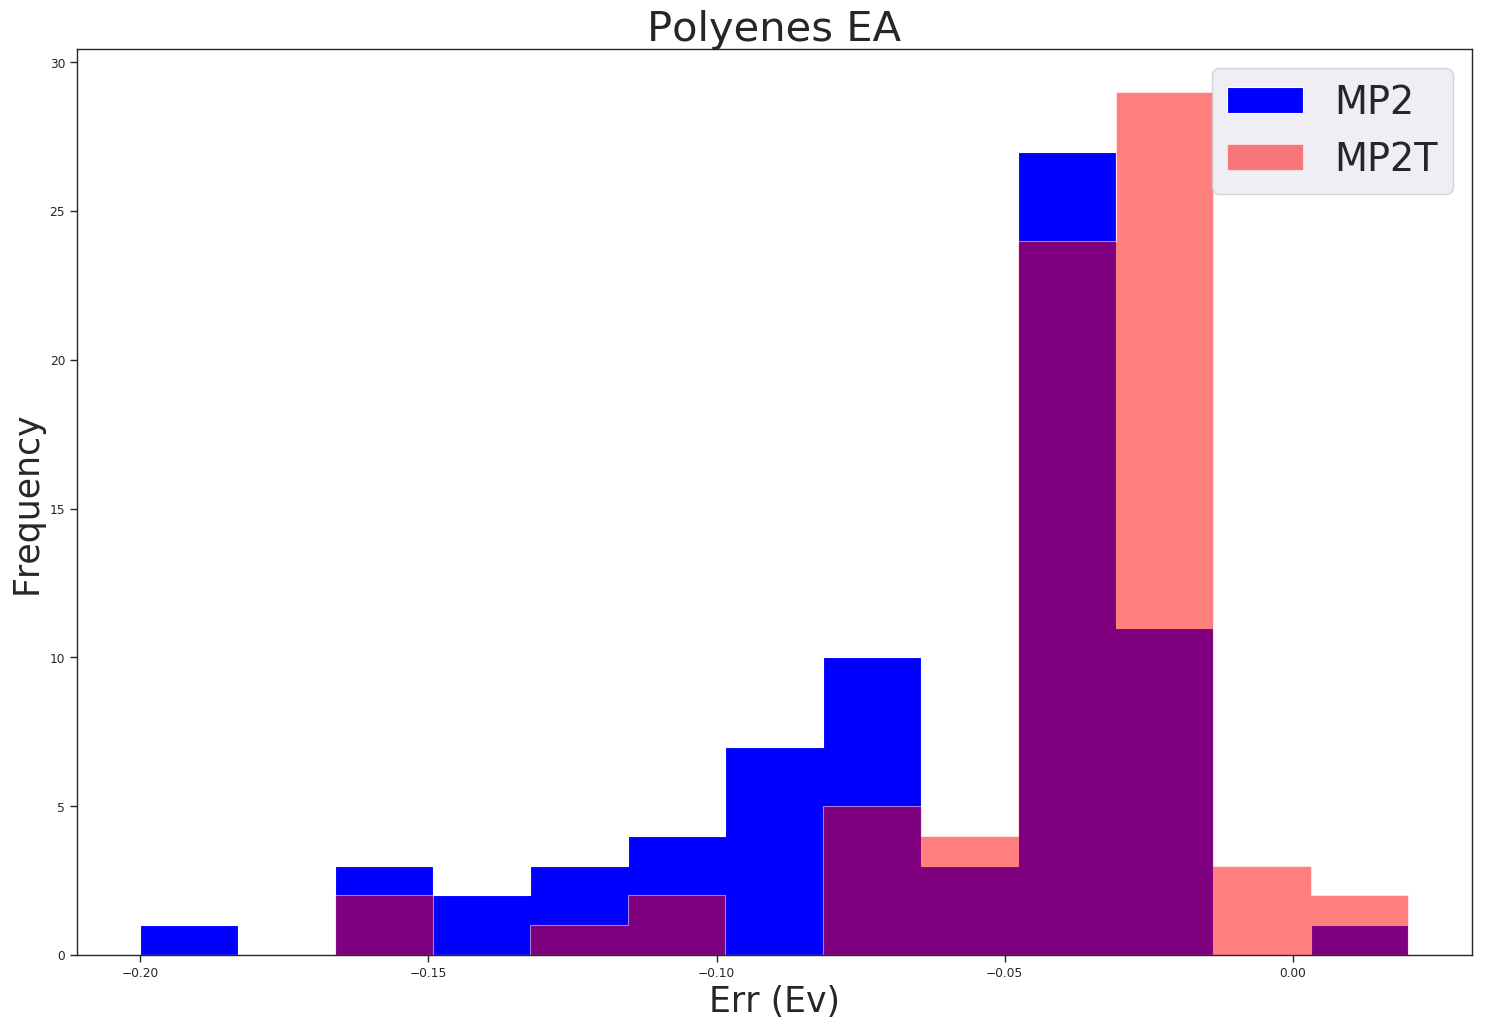

In [40]:
#Define plot size in inches (width, height) & resolution(DPI) and put a white background
fig = plt.figure(figsize=(18, 12), dpi=100)
sns.set_style('ticks')
sns.set_context('paper')


#Define the data
hist1 = err_ea_df_4['MP2']
hist2 = err_ea_df_4['MP2T']

#plot data
plt.hist(hist1, bins_err_4, histtype='stepfilled', label='MP2', color='blue')
plt.hist(hist2, bins_err_4, histtype='stepfilled', alpha=0.5, label='MP2T', color='red')

#configure  X axesgure(figsize=(15, 10)


#configure  Y axes


#labels
plt.xlabel("Err (Ev)", size=25)
plt.ylabel("Frequency", size=25)

#define font size
sns.set(font_scale=2.5)

#title
plt.title("Polyenes EA")



#define font size
sns.set(font_scale=2.5)

#title

plt.legend(loc='upper right')

plt.legend(loc='upper right')
plt.show()

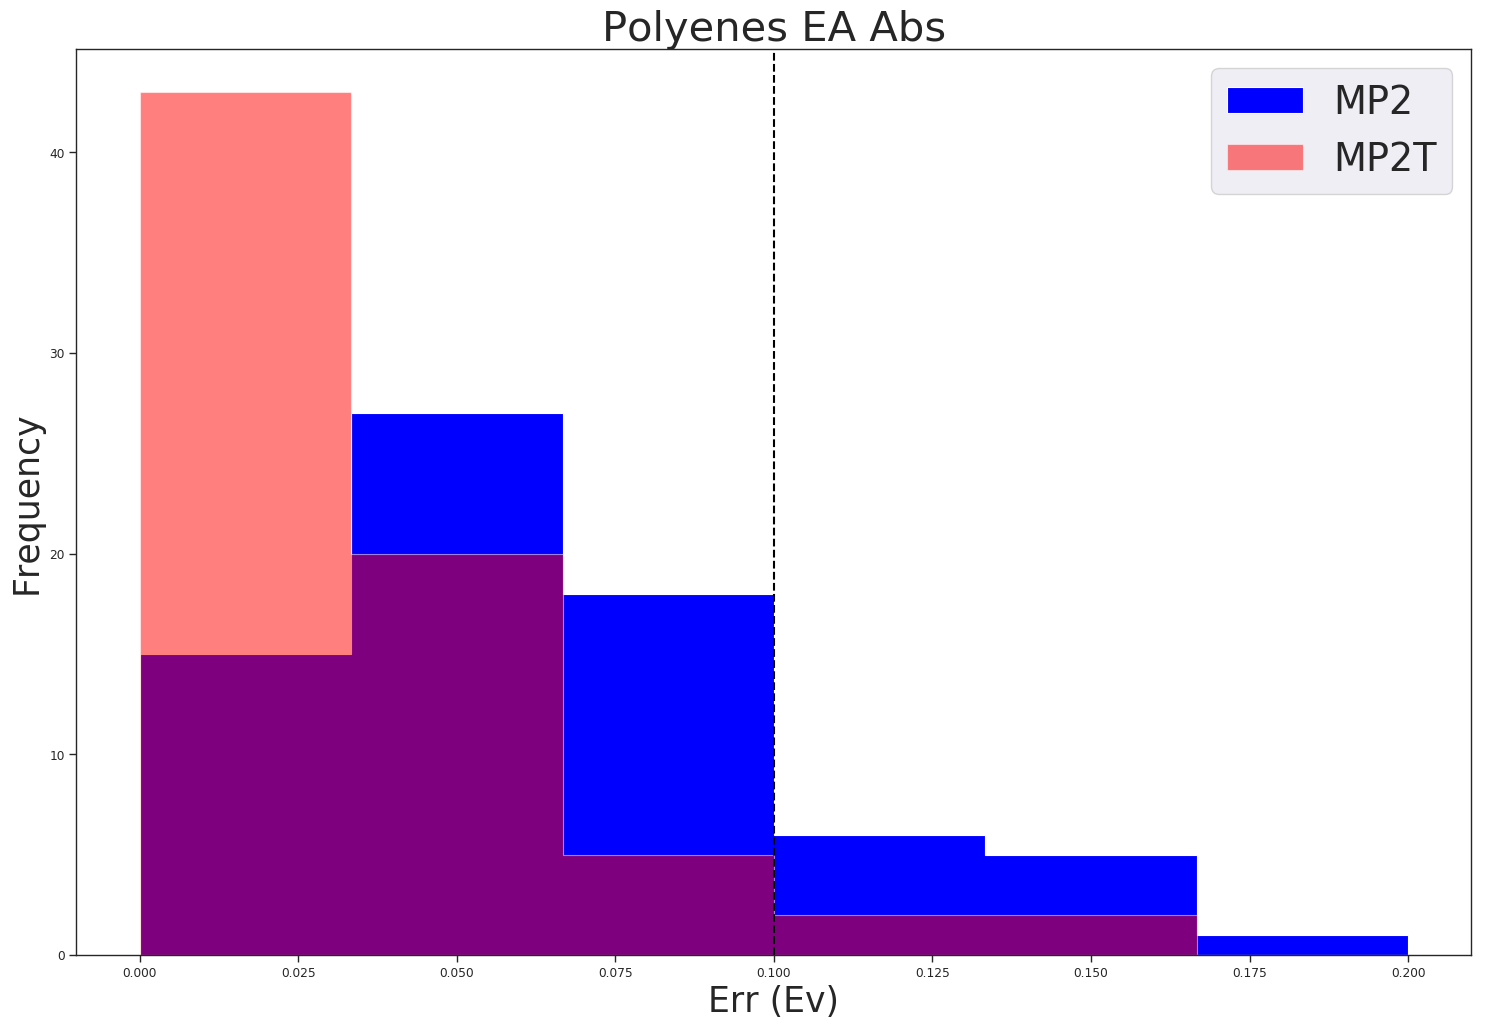

In [41]:
#Define plot size in inches (width, height) & resolution(DPI) and put a white background
fig = plt.figure(figsize=(18, 12), dpi=100)
sns.set_style('ticks')
sns.set_context('paper')


#Define the data
hist3 = abs_ea_df_4['Abs MP2']
hist4 = abs_ea_df_4['Abs MP2T']

#plot data
plt.hist(hist3, bins_abs_4, histtype='stepfilled', label='MP2', color='blue')
plt.hist(hist4, bins_abs_4, histtype='stepfilled', alpha=0.5, label='MP2T', color='red')

#configure  X axes


#configure  Y axes


#labels
plt.xlabel("Err (Ev)", size=25)
plt.ylabel("Frequency", size=25)

#define font size 592 
sns.set(font_scale=2.5)

#title
plt.title("Polyenes EA Abs")

plt.axvline(0.1, color='black', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

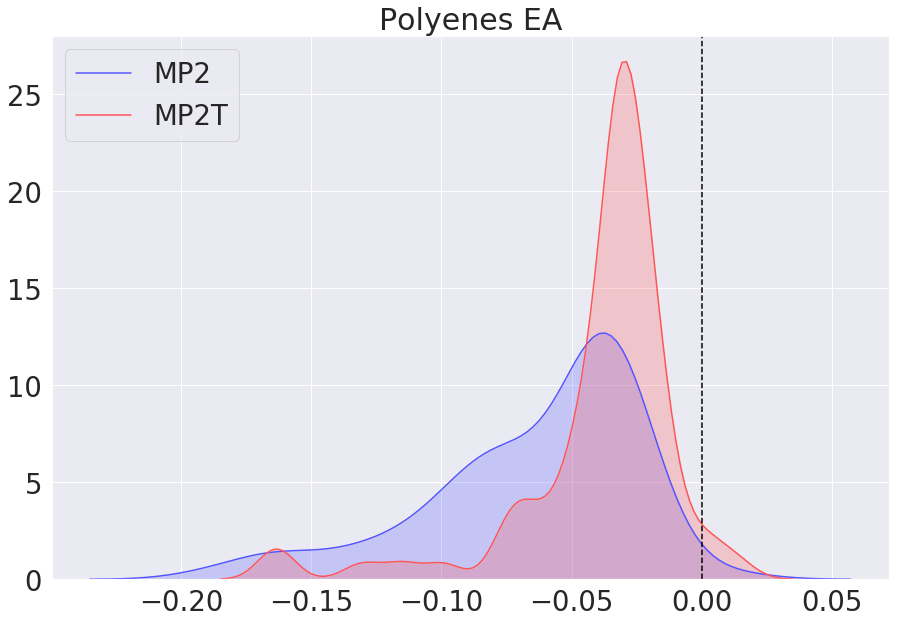

In [42]:
sns.set_style('ticks')
sns.set_context('paper')
fig = plt.figure(figsize=(15, 10))
c1, c2 = sns.color_palette("seismic", 2)


#define font size
sns.set(font_scale=2.5)

#title
plt.title("Polyenes EA")

sns.kdeplot(err_ea_df_4.MP2, kernel='gau', label='MP2', shade=True, color=c1)
sns.kdeplot(err_ea_df_4.MP2T, kernel='gau',  label='MP2T',shade=True, color=c2)

plt.axvline(0, color='black', linestyle='dashed')
plt.show()

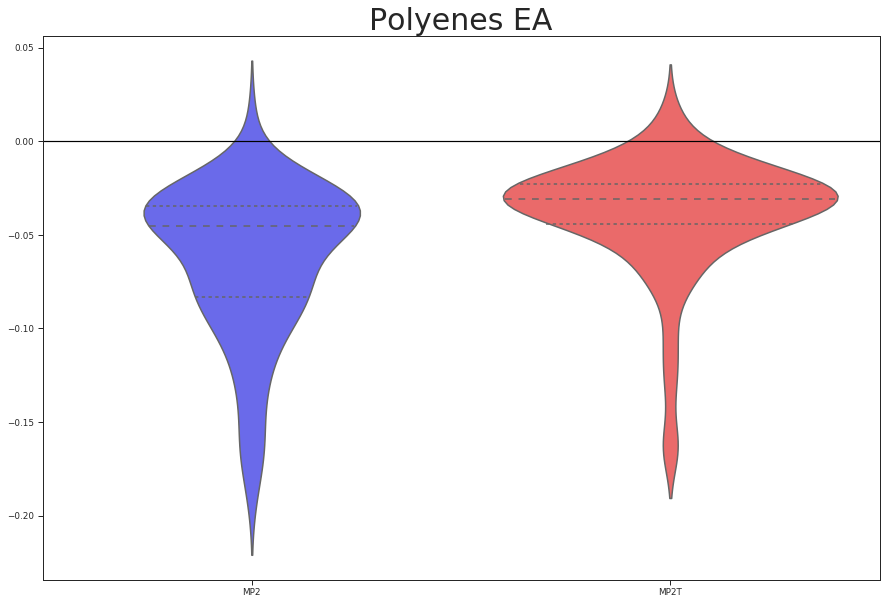

In [43]:
sns.set_style('ticks')
sns.set_context('paper')
fig = plt.figure(figsize=(15, 10))
plt.axhline(0, color='black')



#define font size
sns.set(font_scale=2.5)

#title
plt.title("Polyenes EA")


# Draw a nested violinplot and split the violins for easier comparison
viol = sns.violinplot(data=err_ea_df_4, split=True, inner='quartile', palette='seismic')

<h1 align="center">Small Molecules</h1>

In [44]:
eadf_5 = pd.read_excel('EOM-MP2T.xlsx',sheet_name='set5_EA_small', skiprows=1)
eadf_5.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,EOM-CCSD,EOM-MP2,EOM-MP2T,EOM-MP2.1,EOM-MP2T.1,EOM-MP2.2,EOM-MP2T.2,MP2 first transition,MP2T first transition,Abs MP2 first transition,Abs MP2T first transition
0,s5mol1,NaN,C2v,1A1,3.1873,3.1611,3.1662,-0.0262,-0.0211,0.0262,0.0211,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2A1,3.9972,3.9729,3.9815,-0.0243,-0.0157,0.0243,0.0157,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1A2,4.5421,4.4589,4.5159,-0.0832,-0.0262,0.0832,0.0262,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2A2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1B1,4.1186,4.1002,4.1080,-0.0184,-0.0106,0.0184,0.0106,NaN,NaN,NaN,NaN


In [45]:
#Dataframe for normal errors

err_ea_df_5 = eadf_5[['EOM-MP2.1', 'EOM-MP2T.1']] #We take the specific columns
err_ea_df_5.columns = ['MP2', 'MP2T'] # Now just rename the columns
err_ea_df_5 = err_ea_df_5.dropna() #We ignore the non-values encountered

err_ea_df_5.head() #This juts show the first values of the columns to make sure that we took the right ones

,MP2,MP2T
0,-0.0262,-0.0211
1,-0.0243,-0.0157
2,-0.0832,-0.0262
4,-0.0184,-0.0106
5,-0.0298,-0.0228


In [46]:
#Now just a quick statistical description of the datasets

err_ea_df_5.describe()

,MP2,MP2T
count,240.000000,240.000000
mean,-0.023231,0.013280
std,0.042701,0.047380
min,-0.216000,-0.133700
25%,-0.041600,-0.013750
50%,-0.022450,-0.004300
75%,-0.003550,0.032775
max,0.129100,0.201200


In [47]:
#Dataframe for absolute errors

abs_ea_df_5 = eadf_5[['EOM-MP2.2', 'EOM-MP2T.2']] #We take the specific columns
abs_ea_df_5.columns = ['Abs MP2', 'Abs MP2T'] # Now just rename the columns
abs_ea_df_5 = abs_ea_df_5.dropna() #We ignore the non-values encountered


abs_ea_df_5.head() #This juts show the first values of the columns to make sure that we took the right ones

,Abs MP2,Abs MP2T
0,0.0262,0.0211
1,0.0243,0.0157
2,0.0832,0.0262
4,0.0184,0.0106
5,0.0298,0.0228


In [48]:
#Now just a quick statistical description of the datasets

abs_ea_df_5.describe()

,Abs MP2,Abs MP2T
count,240.000000,240.000000
mean,0.035590,0.032466
std,0.033066,0.036925
min,0.000100,0.000100
25%,0.012800,0.008300
50%,0.025750,0.020900
75%,0.048500,0.040775
max,0.216000,0.201200


In [49]:
#Define the bins for the histograms
#Remember, if you use the key word "auto" in the bins parameter, Seaborn will fit the optimal number

bins_err_5 = np.linspace(-0.22, 0.22, 48)
bins_abs_5 = np.linspace(0, 0.22, 24)

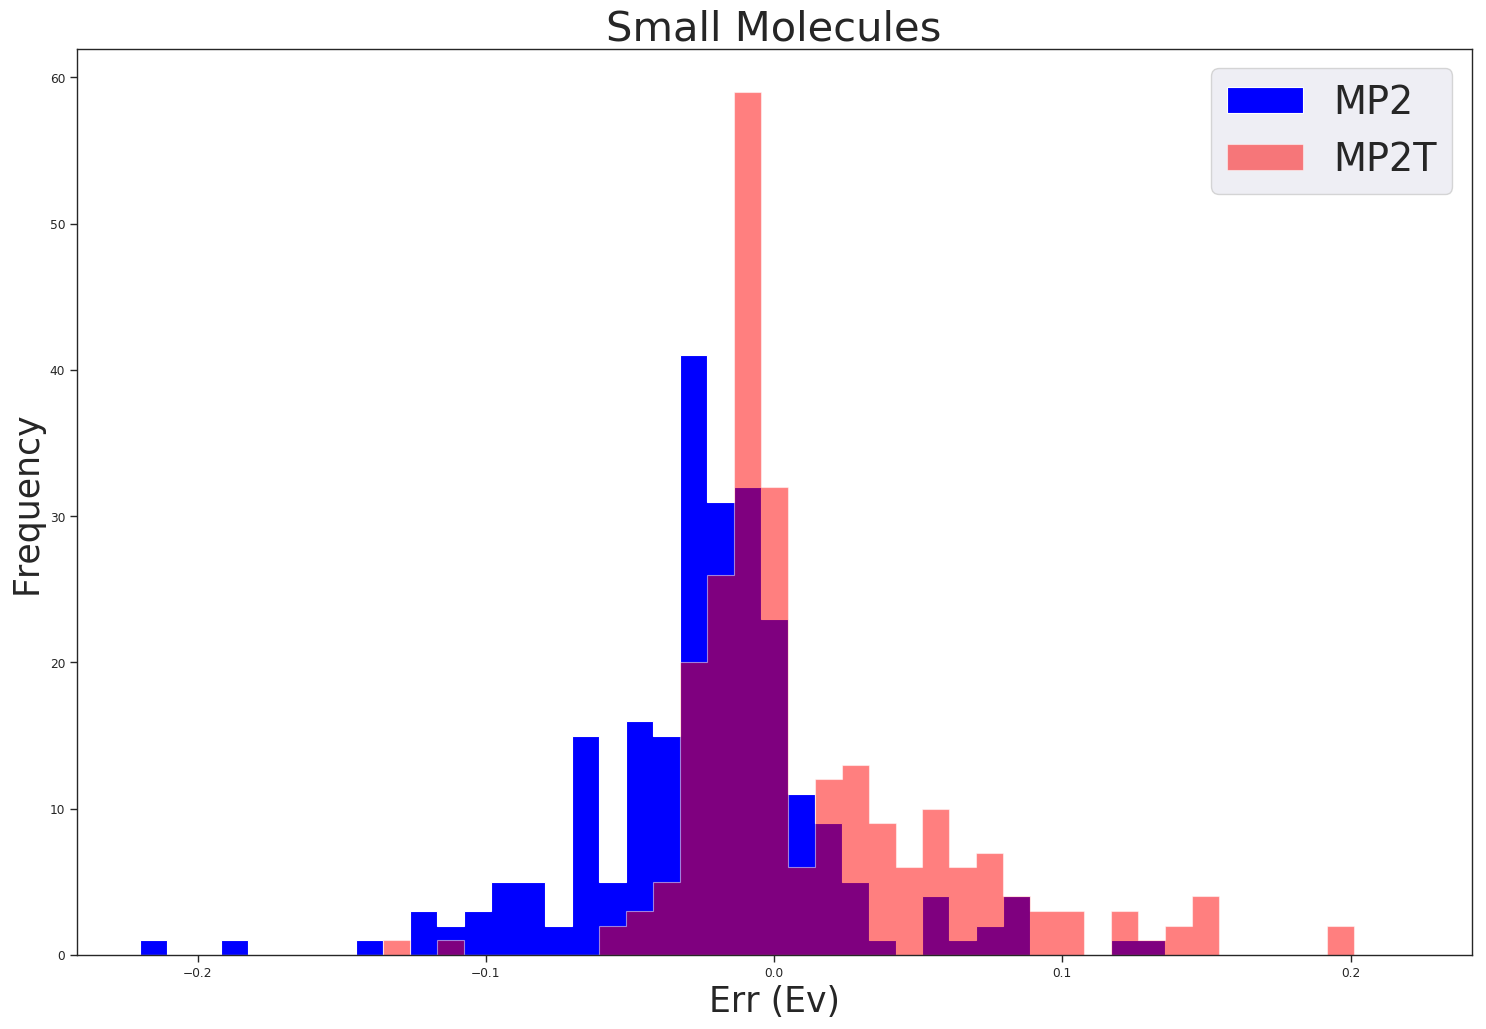

In [50]:
#Define plot size in inches (width, height) & resolution(DPI) and put a white background
fig = plt.figure(figsize=(18, 12), dpi=100)
sns.set_style('ticks')
sns.set_context('paper')


#Define the data
hist1 = err_ea_df_5['MP2']
hist2 = err_ea_df_5['MP2T']

#plot data
plt.hist(hist1, bins_err_5, histtype='stepfilled', label='MP2', color='blue')
plt.hist(hist2, bins_err_5, histtype='stepfilled', alpha=0.5, label='MP2T', color='red')

#configure  X axesgure(figsize=(15, 10)


#configure  Y axes


#labels
plt.xlabel("Err (Ev)", size=25)
plt.ylabel("Frequency", size=25)

#define font size
sns.set(font_scale=2.5)

#title
plt.title("Small Molecules")



#define font size
sns.set(font_scale=2.5)

#title

plt.legend(loc='upper right')

plt.legend(loc='upper right')
plt.show()

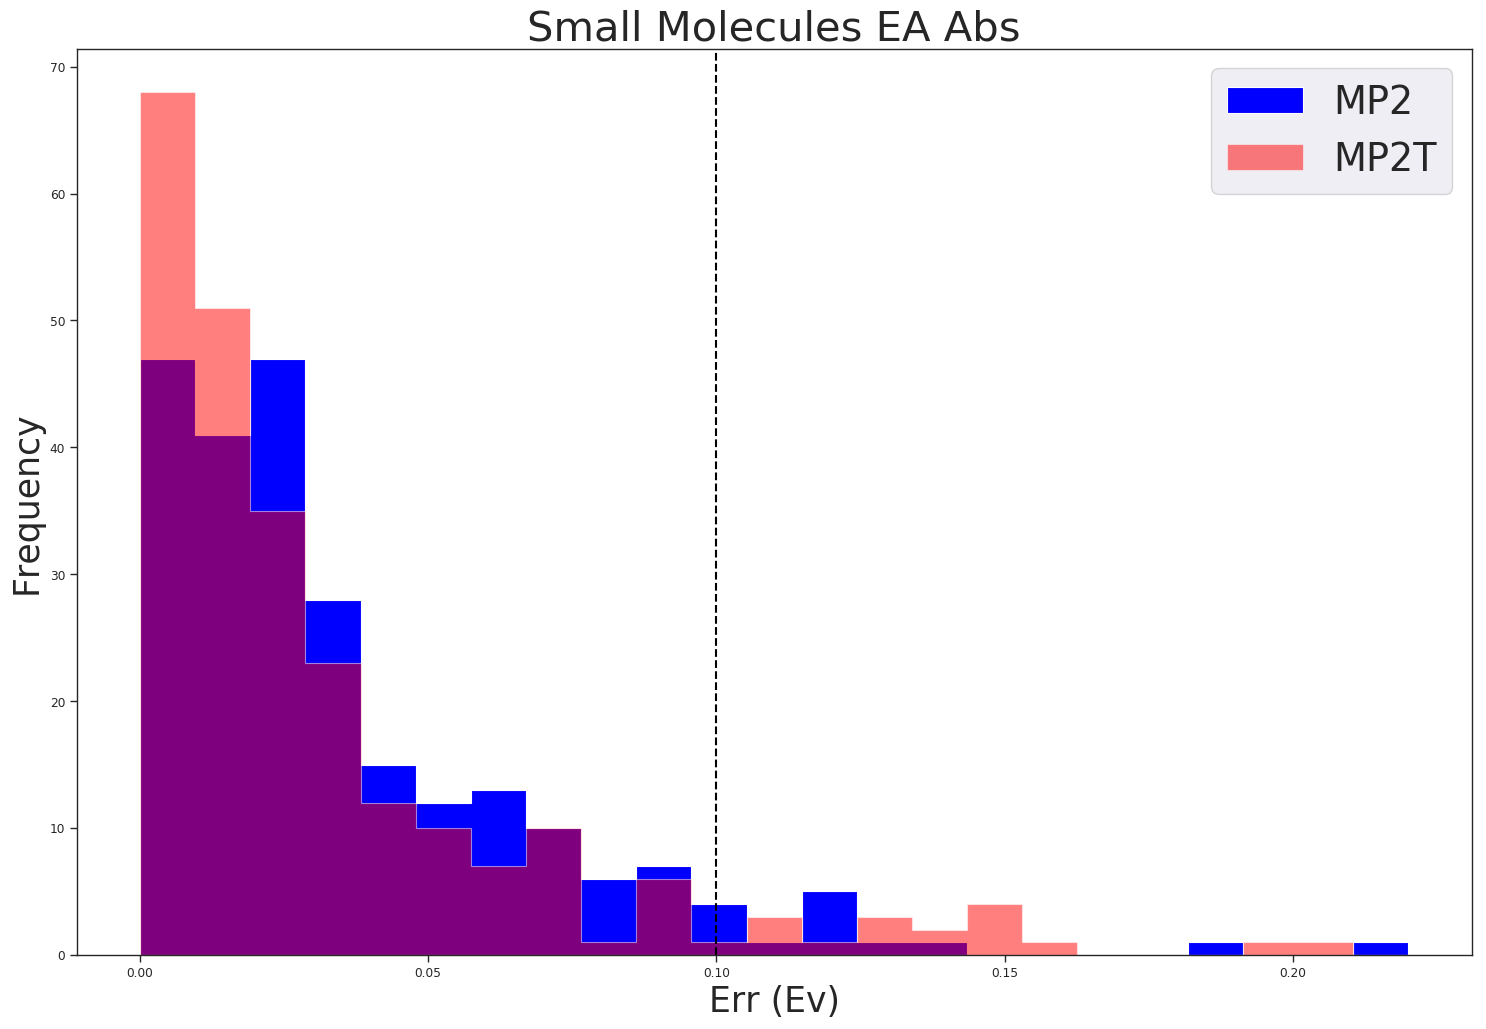

In [51]:
#Define plot size in inches (width, height) & resolution(DPI) and put a white background
fig = plt.figure(figsize=(18, 12), dpi=100)
sns.set_style('ticks')
sns.set_context('paper')



#Define the data
hist3 = abs_ea_df_5['Abs MP2']
hist4 = abs_ea_df_5['Abs MP2T']

#plot data
plt.hist(hist3, bins_abs_5, histtype='stepfilled', label='MP2', color='blue')
plt.hist(hist4, bins_abs_5, histtype='stepfilled', alpha=0.5, label='MP2T', color='red')

#configure  X axes


#configure  Y axes


#labels
plt.xlabel("Err (Ev)", size=25)
plt.ylabel("Frequency", size=25)

#define font size 592 
sns.set(font_scale=2.5)

#title
plt.title("Small Molecules EA Abs")

plt.axvline(0.1, color='black', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

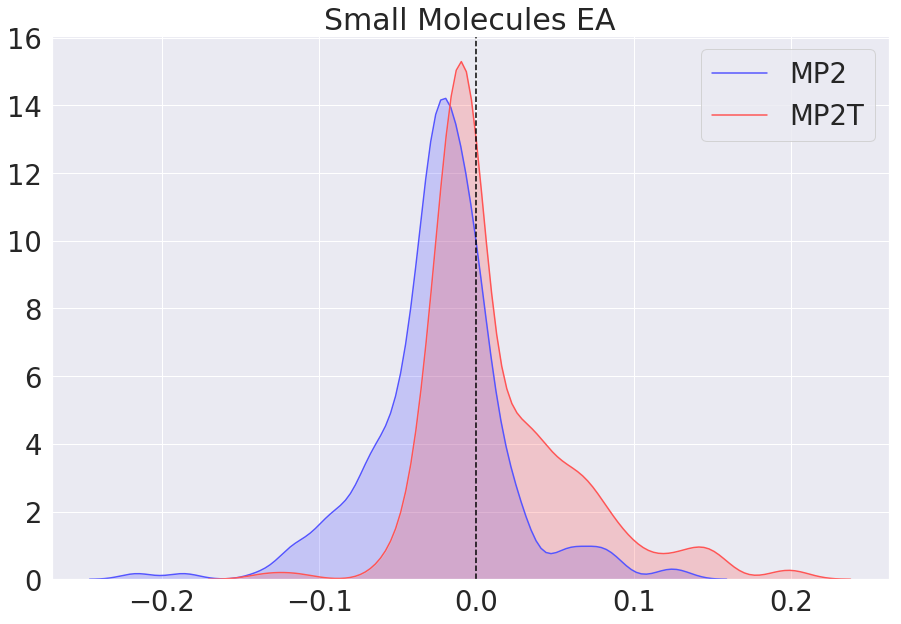

In [52]:
sns.set_style('ticks')
sns.set_context('paper')
fig = plt.figure(figsize=(15, 10))
c1, c2 = sns.color_palette("seismic", 2)



#define font size
sns.set(font_scale=2.5)

#title
plt.title("Small Molecules EA")

sns.kdeplot(err_ea_df_5.MP2, kernel='gau', label='MP2', shade=True, color=c1)
sns.kdeplot(err_ea_df_5.MP2T, kernel='gau',  label='MP2T',shade=True, color=c2)

plt.axvline(0, color='black', linestyle='dashed')
plt.show()

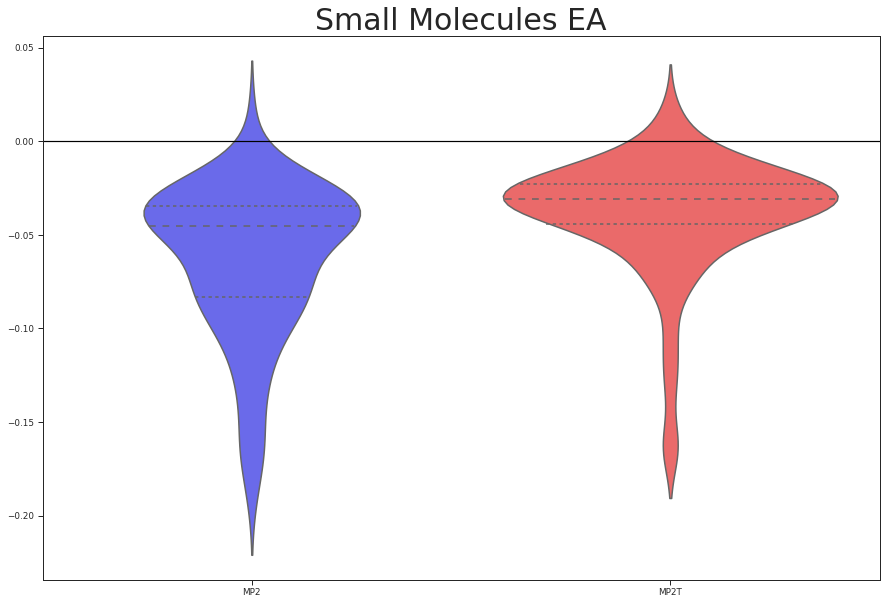

In [53]:
sns.set_style('ticks')
sns.set_context('paper')
fig = plt.figure(figsize=(15, 10))
plt.axhline(0, color='black')

#define font size
sns.set(font_scale=2.5)

#title
plt.title("Small Molecules EA")


# Draw a nested violinplot and split the violins for easier comparison
viol = sns.violinplot(data=err_ea_df_4, split=True, inner='quartile', palette='seismic')

<h1 align="center">Universal Data Set</h1> 

In [54]:
# We define here the data sets that we are going to fuse
frames = [err_ea_df_1, err_ea_df_2, err_ea_df_3, err_ea_df_4, err_ea_df_5]

In [55]:
# Now we create the universial dataframe
universal_err_ea_df = pd.concat(frames)

In [56]:
# Quick view of the universial dataframe
universal_err_ea_df.head()

,MP2,MP2T
0,-0.0755,-0.0144
1,-0.0535,-0.0095
2,-0.0948,0.0328
3,0.0245,0.0937
4,-0.0656,-0.0098


In [57]:
# Quick statistical description of the universial dataframe
universal_err_ea_df.describe()

,MP2,MP2T
count,406.000000,406.000000
mean,-0.006664,0.022929
std,0.087133,0.073141
min,-0.216000,-0.163600
25%,-0.045250,-0.021075
50%,-0.023850,-0.004950
75%,0.003175,0.055825
max,0.385300,0.327300


In [58]:
# Now we do the same for the absolute values
frames2 = [abs_ea_df_1, abs_ea_df_2, abs_ea_df_3, abs_ea_df_4, abs_ea_df_5]

In [59]:
# Now we create the universial dataframe
universal_abs_ea_df = pd.concat(frames2)

In [60]:
# Quick view of the universial dataframe for abs values
universal_abs_ea_df.head()

,Abs MP2,Abs MP2T
0,0.0755,0.0144
1,0.0535,0.0095
2,0.0948,0.0328
3,0.0245,0.0937
4,0.0656,0.0098


In [61]:
universal_abs_ea_df.describe()

,Abs MP2,Abs MP2T
count,406.000000,406.000000
mean,0.056480,0.049645
std,0.066625,0.058361
min,0.000100,0.000100
25%,0.018600,0.010850
50%,0.033700,0.027650
75%,0.069900,0.066125
max,0.385300,0.327300


In [62]:
universal_stat = universal_err_ea_df.describe()

In [63]:
stat_tex= universal_stat.to_latex()

In [64]:
print(stat_tex)

\begin{tabular}{lrr}
\toprule
{} &         MP2 &        MP2T \\
\midrule
count &  406.000000 &  406.000000 \\
mean  &   -0.006664 &    0.022929 \\
std   &    0.087133 &    0.073141 \\
min   &   -0.216000 &   -0.163600 \\
25\%   &   -0.045250 &   -0.021075 \\
50\%   &   -0.023850 &   -0.004950 \\
75\%   &    0.003175 &    0.055825 \\
max   &    0.385300 &    0.327300 \\
\bottomrule
\end{tabular}



In [65]:
#Define the bins for the histograms
#Remember, if you use the key word "auto" in the bins parameter, Seaborn will fit the optimal number

univ_bins_err = np.linspace(-0.25, 0.35, 110)
univ_bins_abs = np.linspace(0, 0.50, 55)

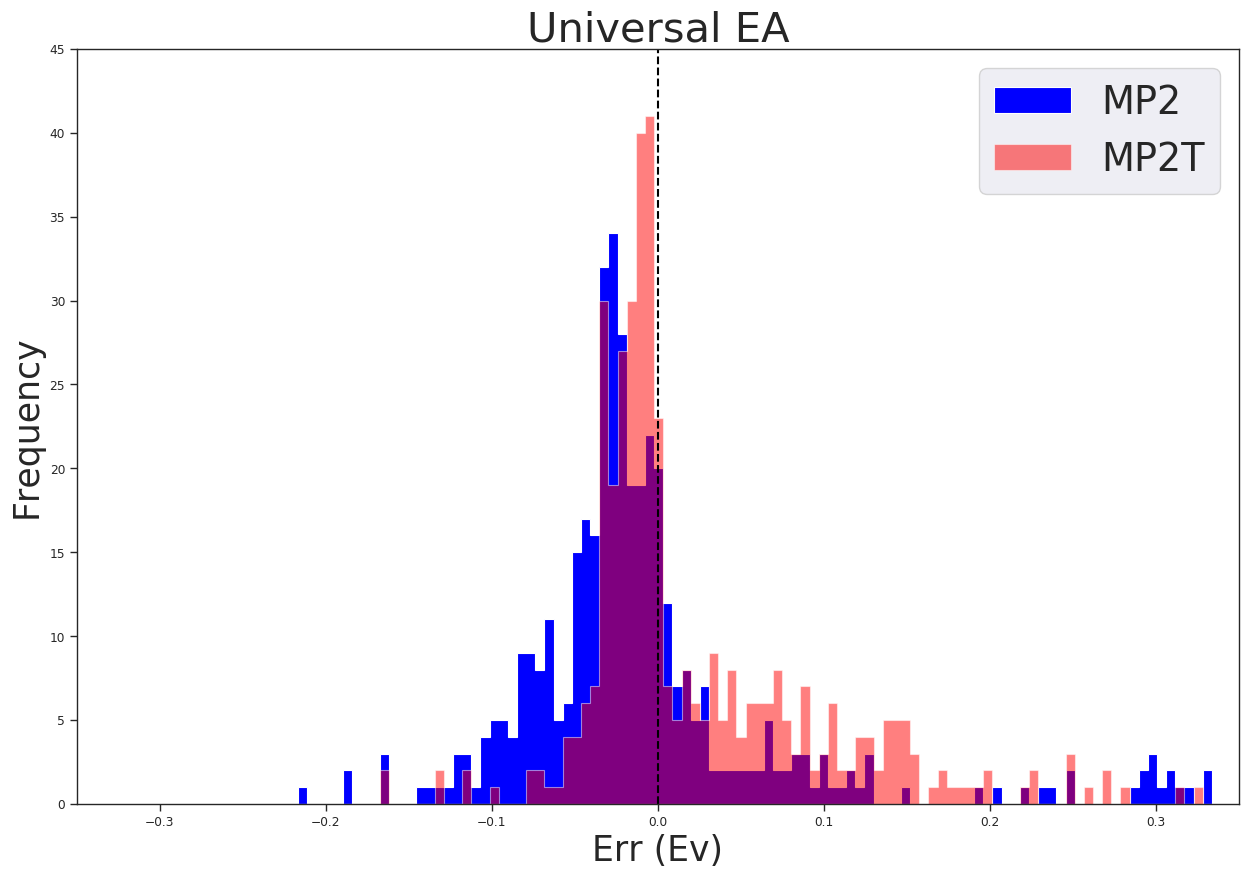

In [66]:
#Define plot size in inches (width, height) & resolution(DPI) and put a white background
fig = plt.figure(figsize=(15, 10), dpi=100)
sns.set_style('ticks')
sns.set_context('paper')


#Define the data
hist1 = universal_err_ea_df['MP2']
hist2 = universal_err_ea_df['MP2T']

#plot data
plt.hist(hist1, univ_bins_err, histtype='stepfilled', label='MP2', color='blue')
plt.hist(hist2, univ_bins_err, histtype='stepfilled', alpha=0.5, label='MP2T', color='red')

#configure  X axes
plt.xlim(-.35,.35)

#configure  Y axes
plt.ylim(0,45)

#labels
plt.xlabel("Err (Ev)", size=25)
plt.ylabel("Frequency", size=25)

#define font size
sns.set(font_scale=2.5)

#title
plt.title("Universal EA")

plt.axvline(0, color='black', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

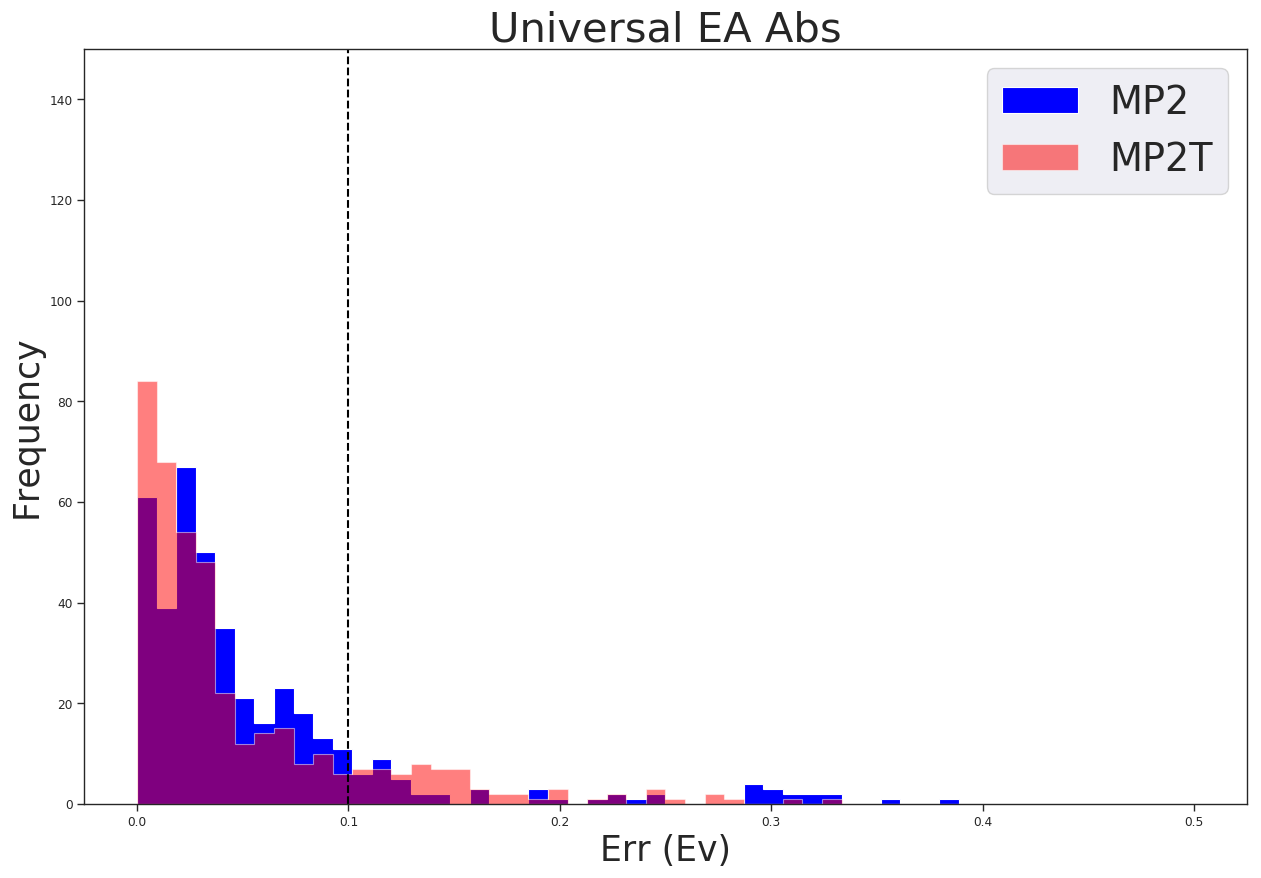

In [67]:
#Define plot size in inches (width, height) & resolution(DPI) and put a white background
fig = plt.figure(figsize=(15, 10), dpi=100)
sns.set_style('ticks')
sns.set_context('paper')


#Define the data
hist3 = universal_abs_ea_df['Abs MP2']
hist4 = universal_abs_ea_df['Abs MP2T']

#plot data
plt.hist(hist3, univ_bins_abs, histtype='stepfilled', label='MP2', color='blue')
plt.hist(hist4, univ_bins_abs, histtype='stepfilled', alpha=0.5, label='MP2T', color='red')

#configure  X axes


#configure  Y axes
plt.ylim(0,150)

#labels
plt.xlabel("Err (Ev)", size=25)
plt.ylabel("Frequency", size=25)

#define font size 592 
sns.set(font_scale=2.5)

#title
plt.title("Universal EA Abs")

plt.axvline(0.1, color='black', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

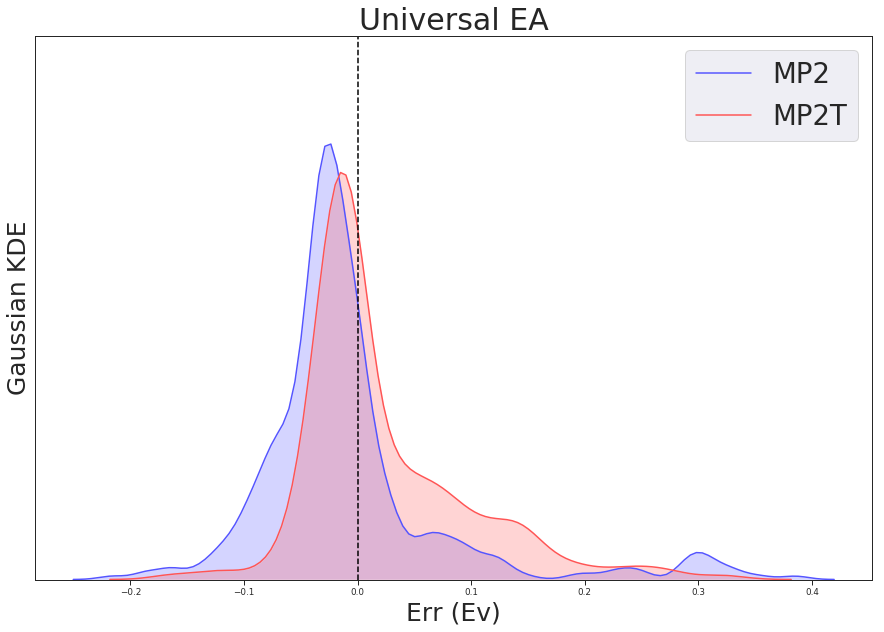

In [68]:
sns.set_style('ticks')
sns.set_context('paper')
fig = plt.figure(figsize=(15, 10))
c1, c2 = sns.color_palette("seismic", 2)
plt.yticks([])


plt.ylim(0,14)


#define font size
sns.set(font_scale=2.5)

#title
plt.title("Universal EA")
plt.xlabel("Err (Ev)", size=25)
plt.ylabel("Gaussian KDE", size=25)


sns.kdeplot(universal_err_ea_df.MP2, kernel='gau', label='MP2', shade=True, color=c1)
sns.kdeplot(universal_err_ea_df.MP2T, kernel='gau',  label='MP2T',shade=True, color=c2)

plt.axvline(0, color='black', linestyle='dashed')
plt.show()

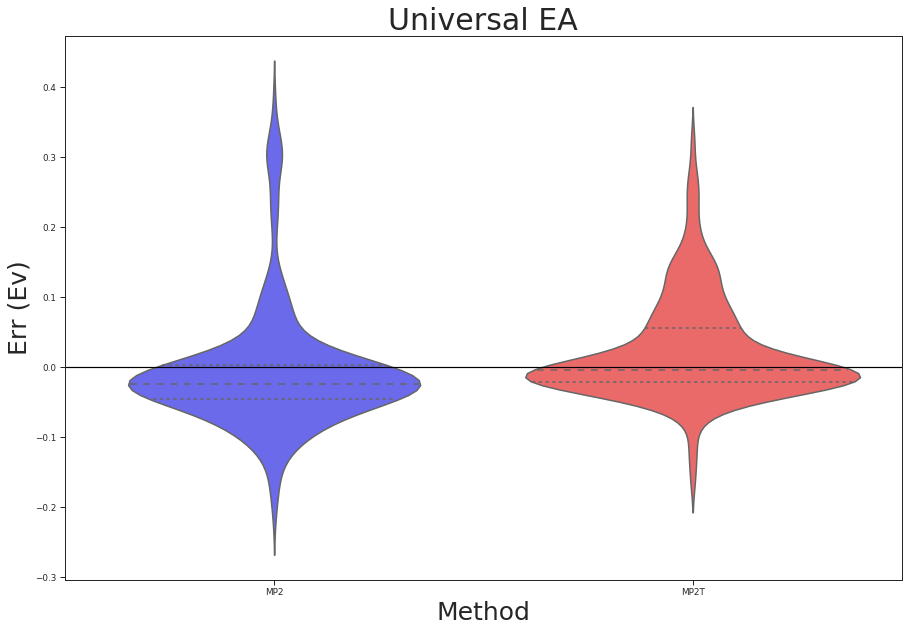

In [69]:
sns.set_style('ticks')
sns.set_context('paper')
fig = plt.figure(figsize=(15, 10))
plt.axhline(0, color='black')

#define font size
sns.set(font_scale=2.5)

#title
plt.title("Universal EA")
plt.xlabel("Method", size=25)
plt.ylabel("Err (Ev)", size=25)

# Draw a nested violinplot and split the violins for easier comparison
viol = sns.violinplot(data=universal_err_ea_df, split=True, inner='quartile', palette='seismic')